In [1]:
from IPython.display import Image

%sql

use spark_db\
show tables

------
spark.catalog.listDatabases.show(false)

------

%sql

create database spark_db2

-----
spark.catalog.listDatabases.show(false)

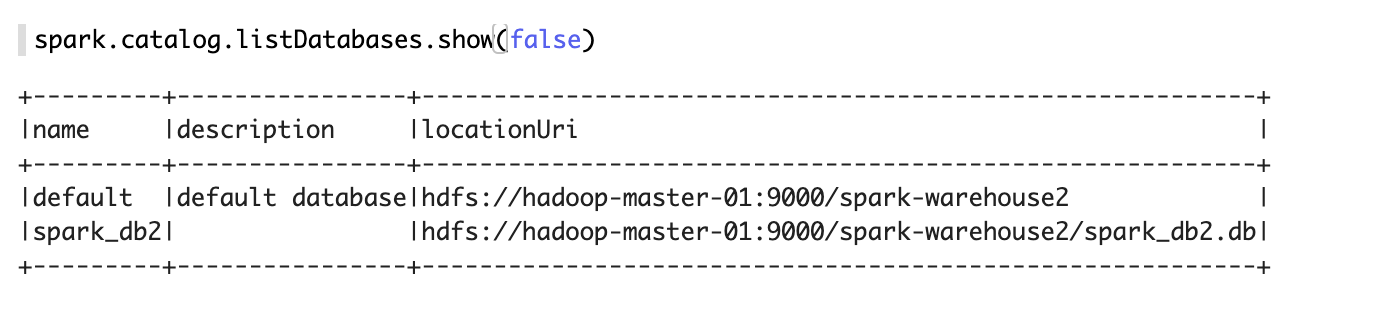

In [2]:
Image("./capture/create_spark_db2.png")

    val df = spark
        .read
        .option("header",true)
        .csv("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")

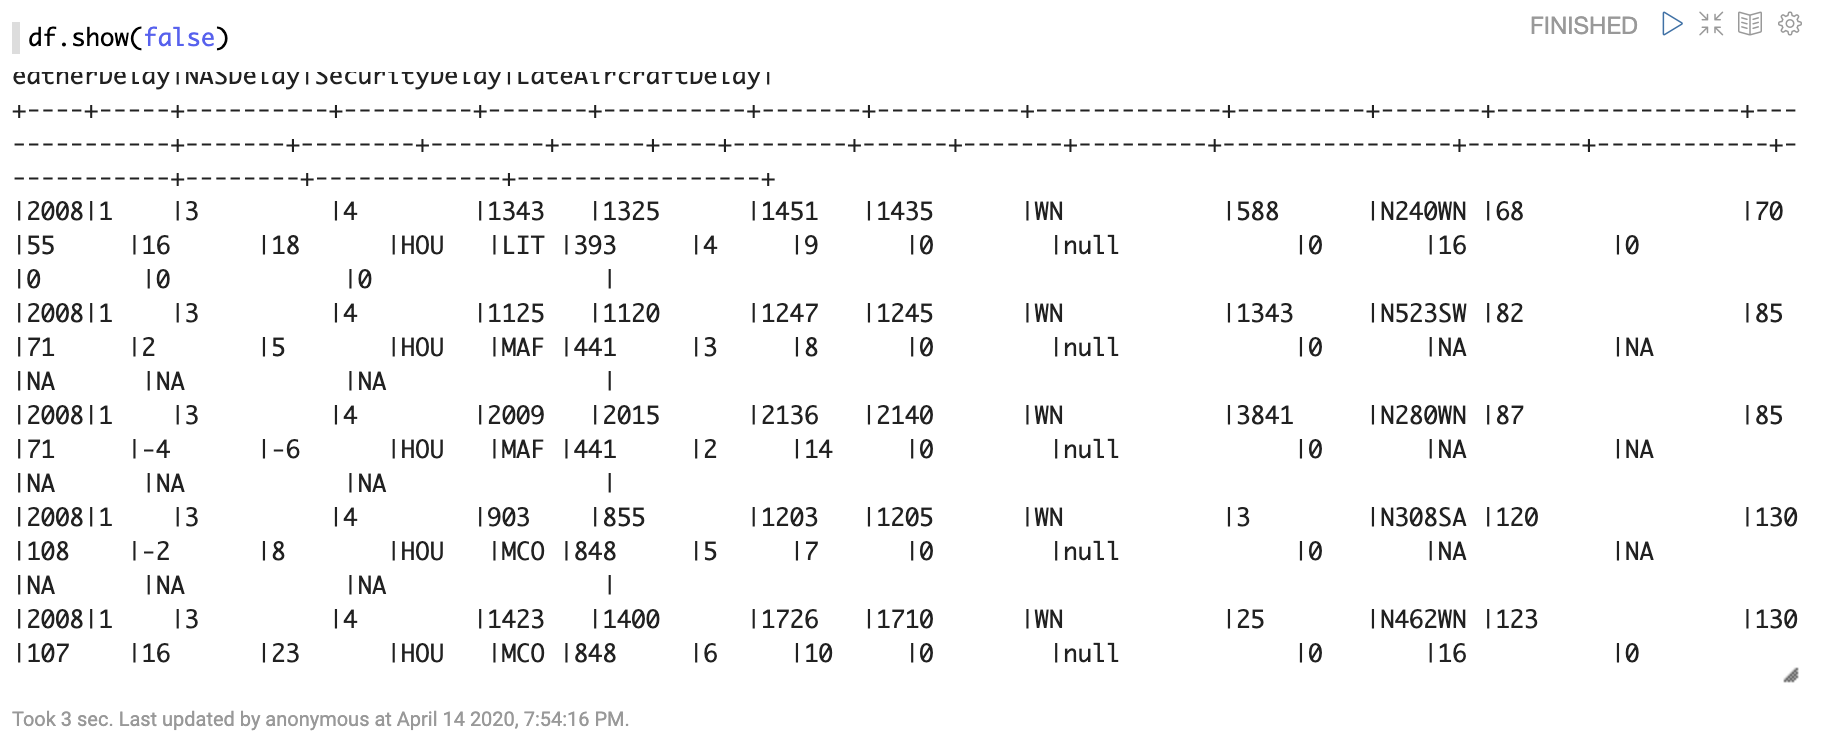

In [3]:
Image('./capture/header_show.png')

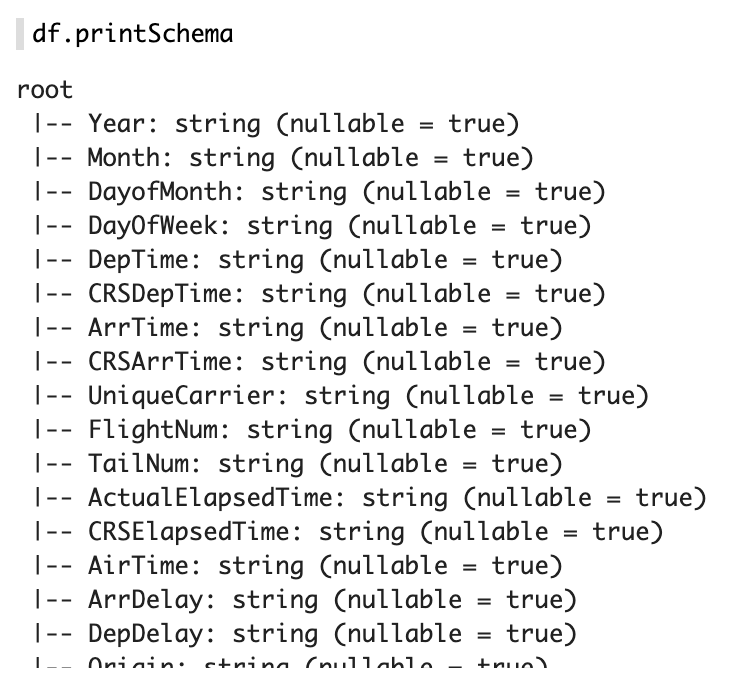

In [4]:
Image('./capture/header_showschema.png')

    val df = spark
        .read
        .option("header",true)
        .option("inferSchema",true)
        .csv("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")

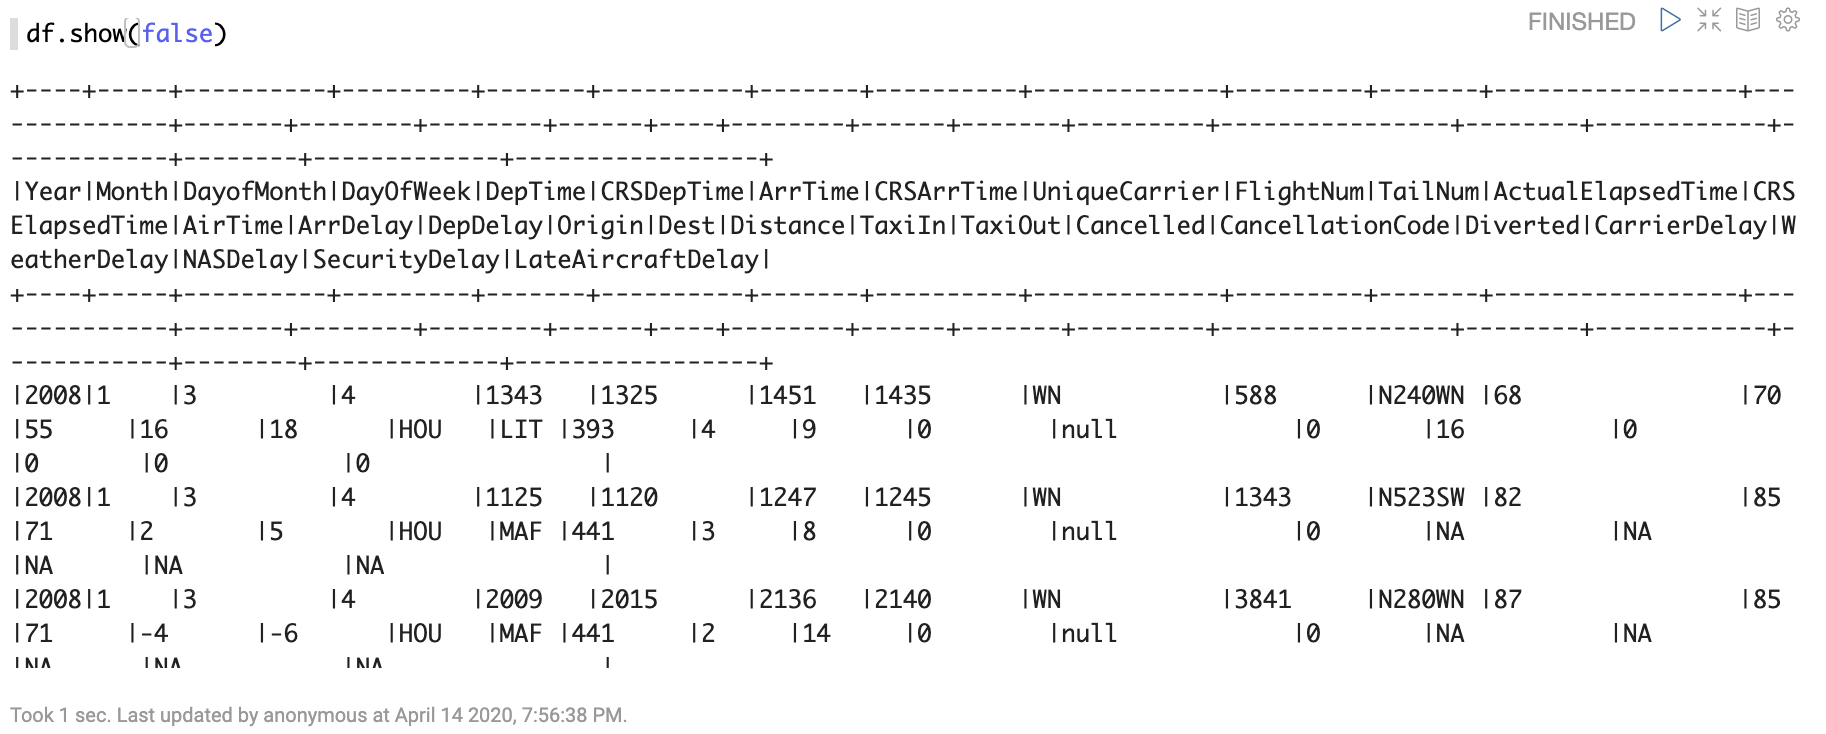

In [6]:
Image("./capture/inferschema_show.png")

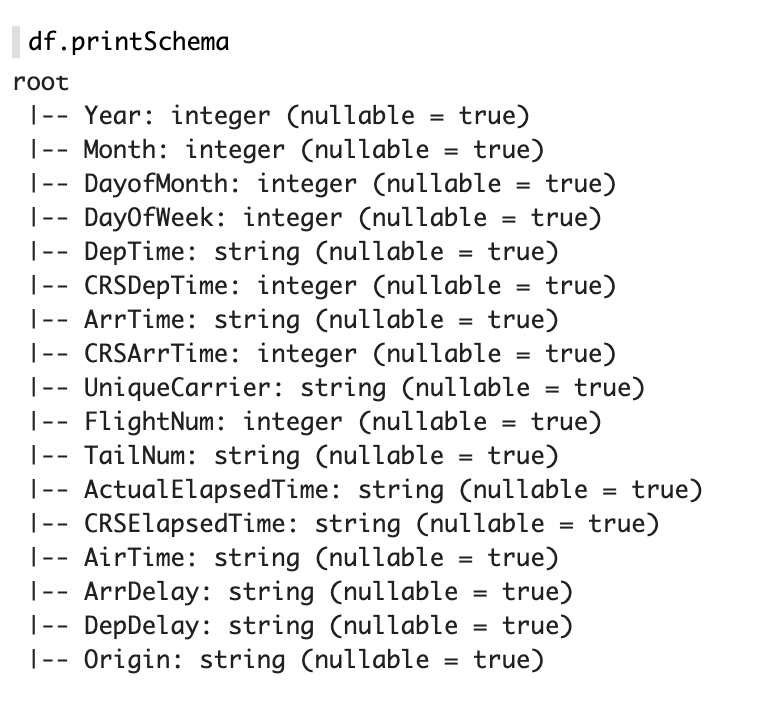

In [7]:
Image('./capture/inferschema_print.png')

df.write.saveAsTable("spark_db2.2008_csv")

-----

spark.catalog.listTables.show(false)\
spark.catalog.listDatabases.show(false)


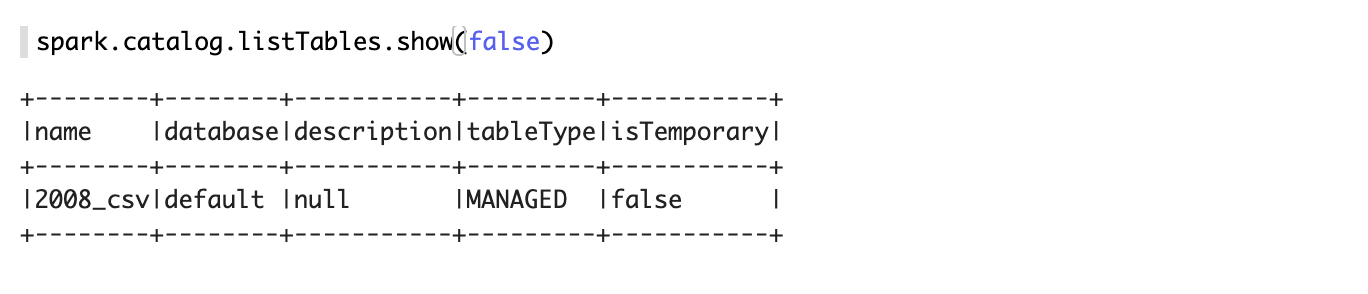

In [12]:
Image("./capture/listtables_default.png")

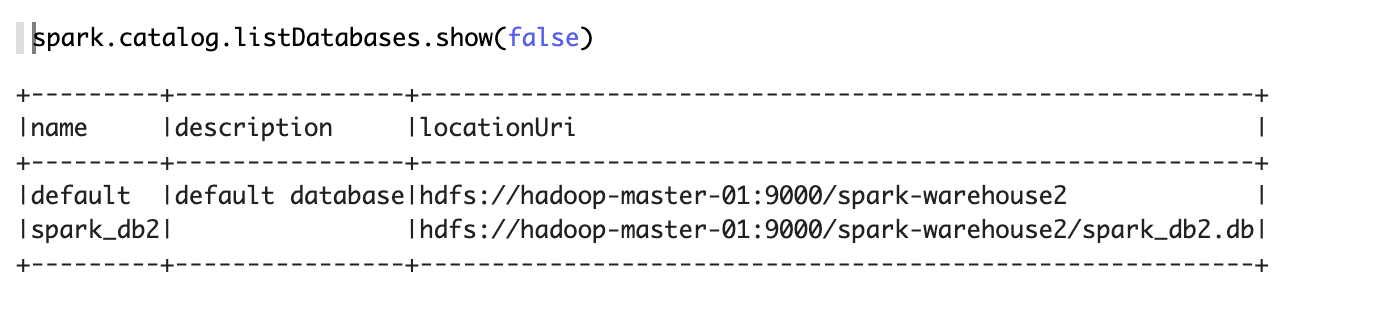

In [9]:
Image("./capture/listDatabase_db2.png")

-----
spark.catalog.currentDatabase

-----
spark.catalog.setCurrentDatabase("spark_db2")

-----
#### default --> spark_db2

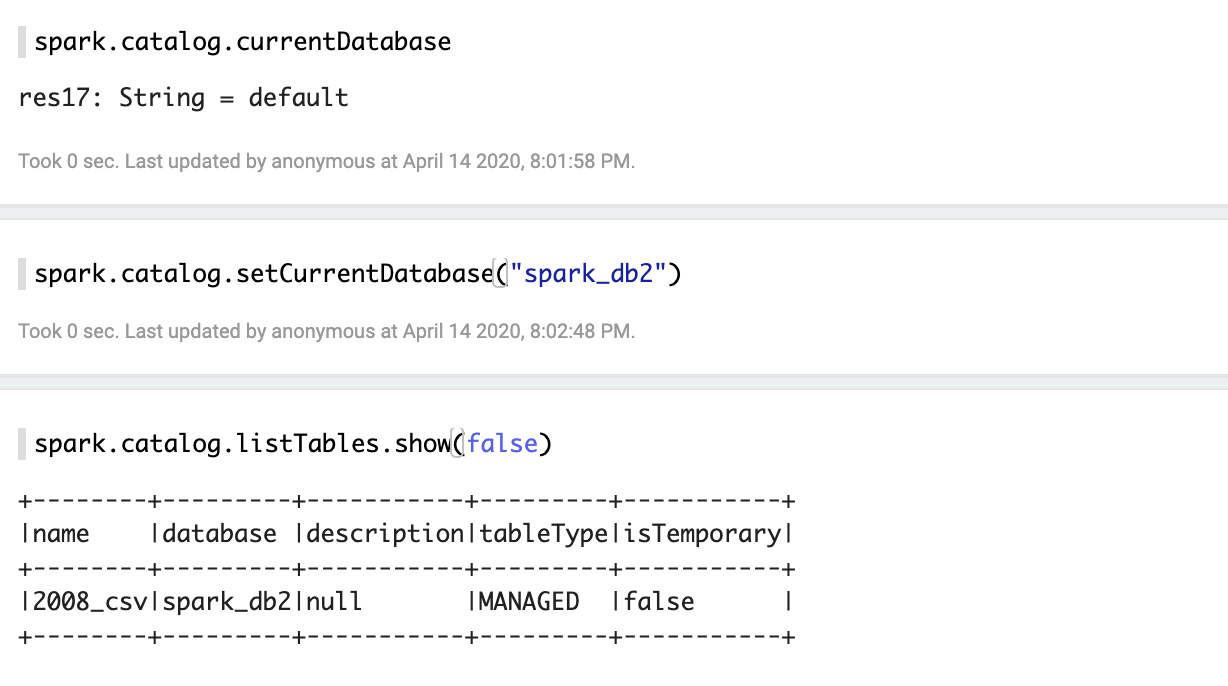

In [8]:
Image("./capture/path_change.png")

-----

#### hdfs
warehouse dir -> table(data)\
metastore db -> metaData\
(RDB) --> MySQL, derby(session#1)

------
%spark3

spark.catalog.listDatabases.show(false)



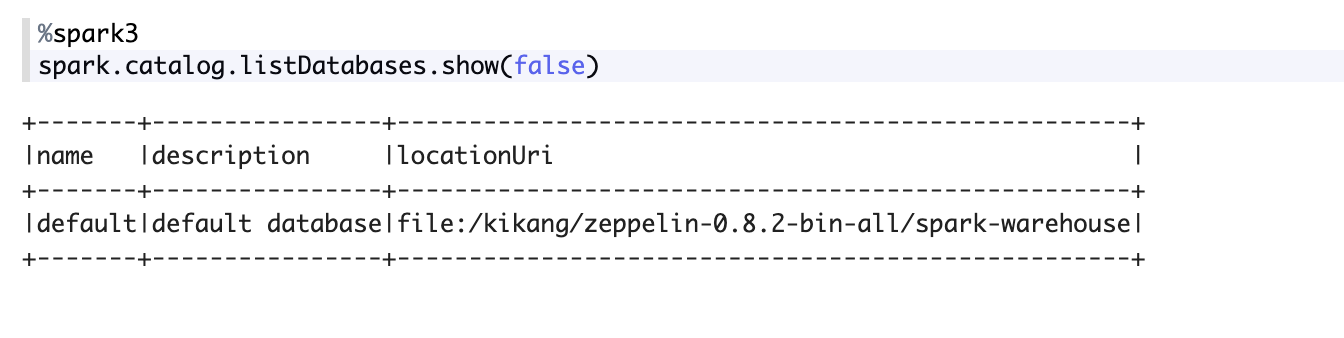

In [13]:
Image('./capture/spark3_listDatabases.png')

interpreter (spark2, spark3) option
- zeppelin.spark.useNew 해제

-----
spark.catalog.listDatabases.show(false)

------
%spark3
spark.catalog.listTDatabases.show(false)

---> 둘 중에 먼저 실행된 것만 붙기 때문에 나머지 하나는 에러발생\
---> 더비는 두개 사용 불가

---- 
spark2, spark3 restart

    %sql

    create database spark_db3

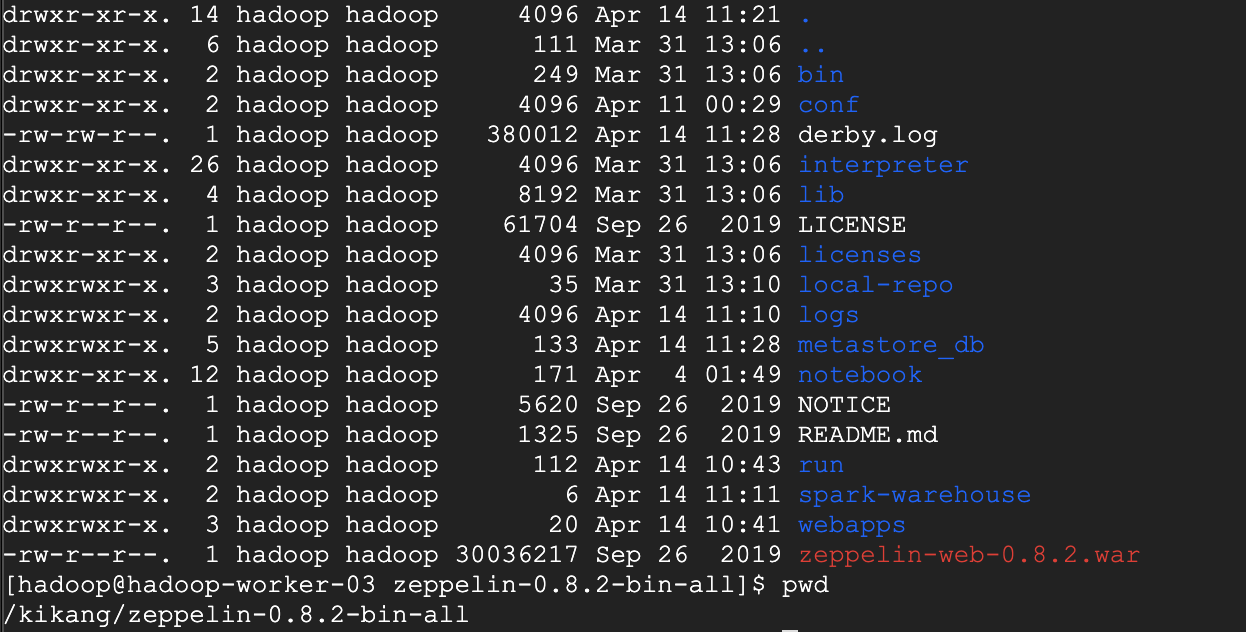

In [14]:
Image('./capture/zeppelin_pwd.png')

derby.log\
metastore_db\
spark-warehouse

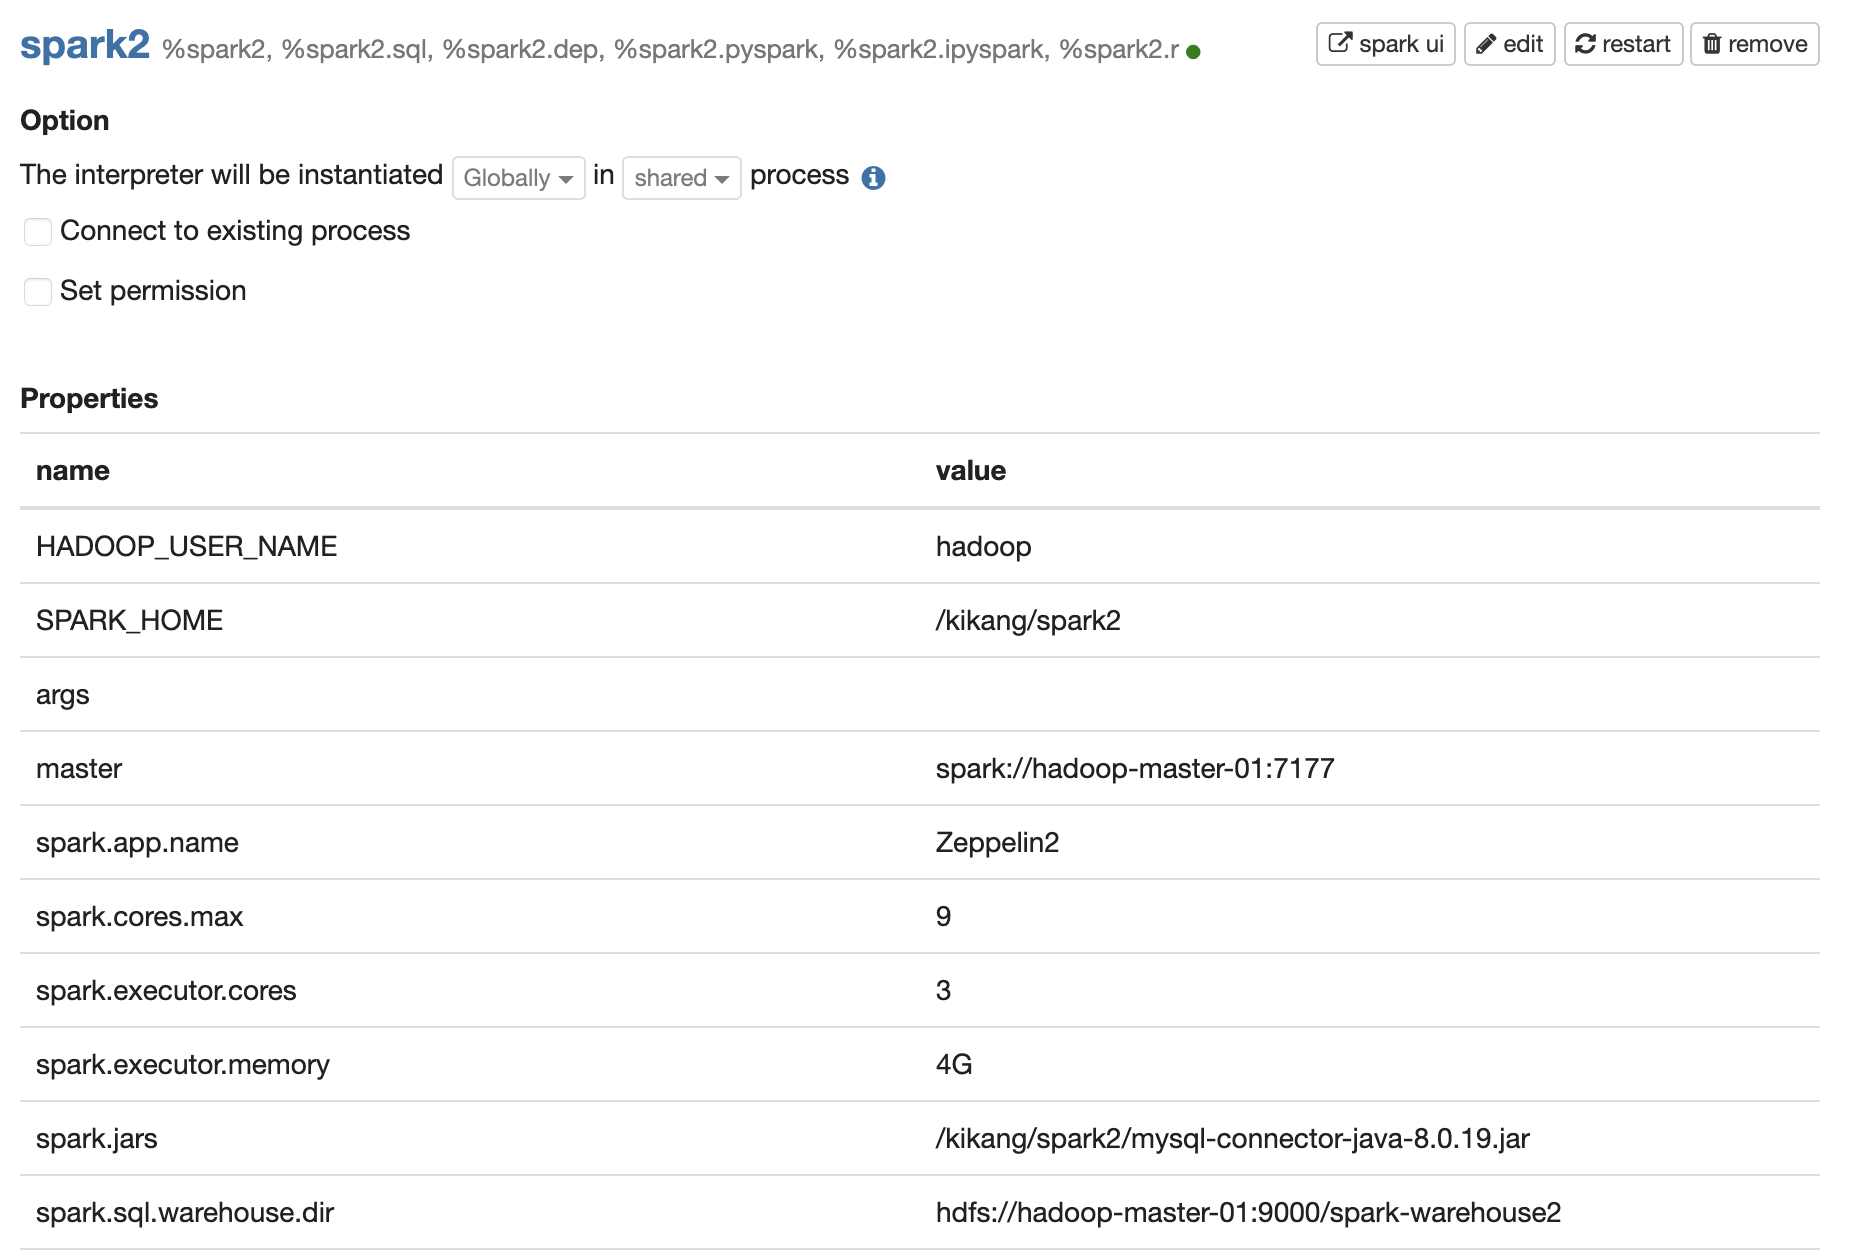

In [15]:
Image('./capture/spark_warehouse_path.png')

#### 둘다 접근할 수 있도록 설정변경 ( interpreter )
----
#### spark2

 - xml 설정을 그대로 쓰려면 spark.hadoop 을 붙이면 가능
 
 javax.jdo.option.ConnectionURL
     
     - javax == java extension
     
 jdbc:mysql://hadoop-worker-02:3306/metastore_db?createDatabaseIfNotExist=true
 
     - metastore_db? 뒷부분은 option
 
------
- mysql (worker-02)\
     --> 'root' 계정에 패스워드 'root' 설정....

$ sudo mysql

$ use mysql;

$ show databases;

$ SELECT Host , User, Password FROM mysql.user;

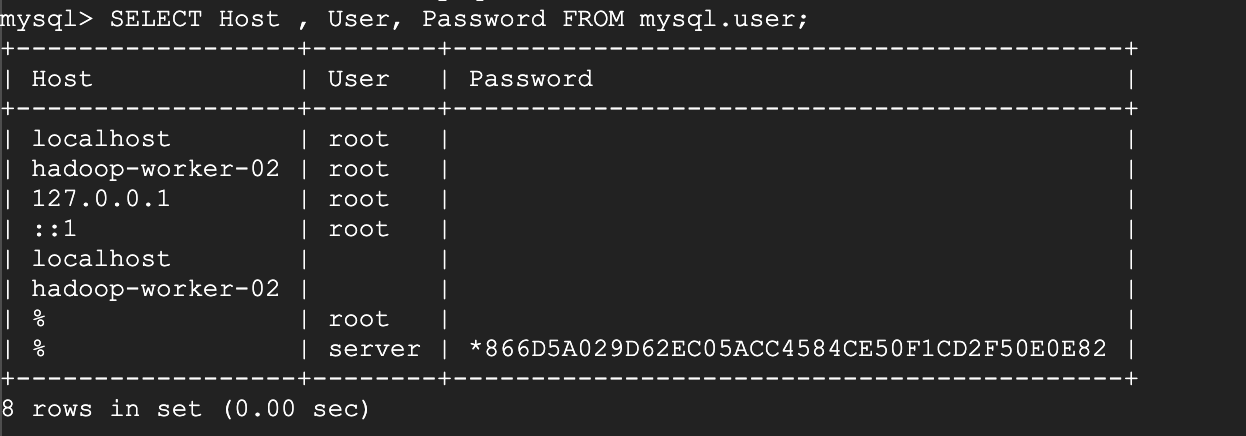

In [16]:
Image('./capture/SQL_01.png')

$ update user set password=PASSWORD("root") where user = 'root';

$ SELECT Host , User, Password FROM mysql.user;

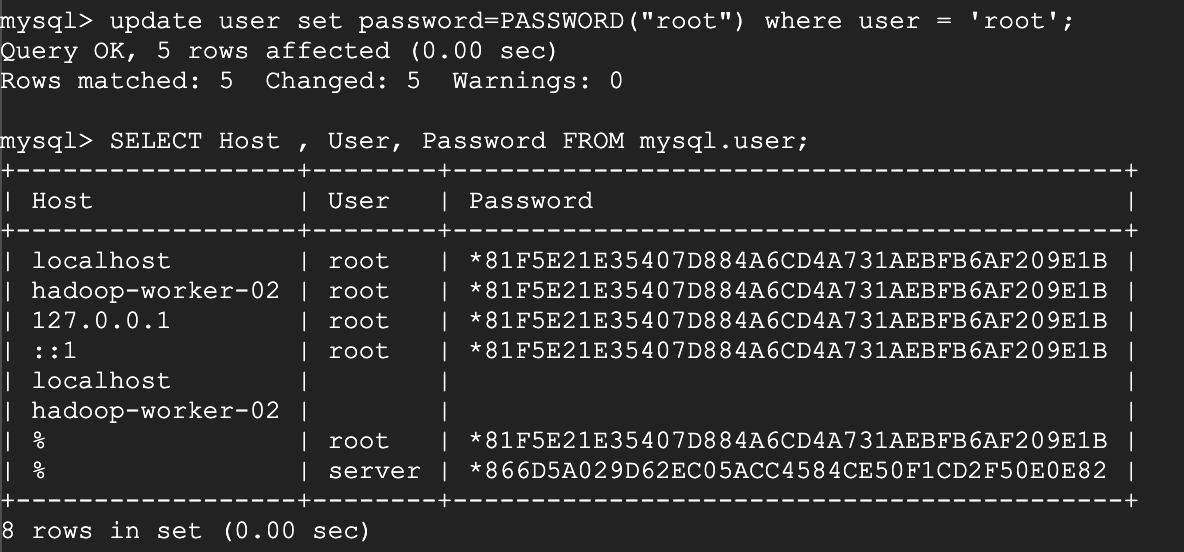

In [17]:
Image("./capture/SQL_02.png")

$ grant all on *.* to 'root'@'%' identified by 'root' with grant option;

$ flush privileges;

$ show databases;

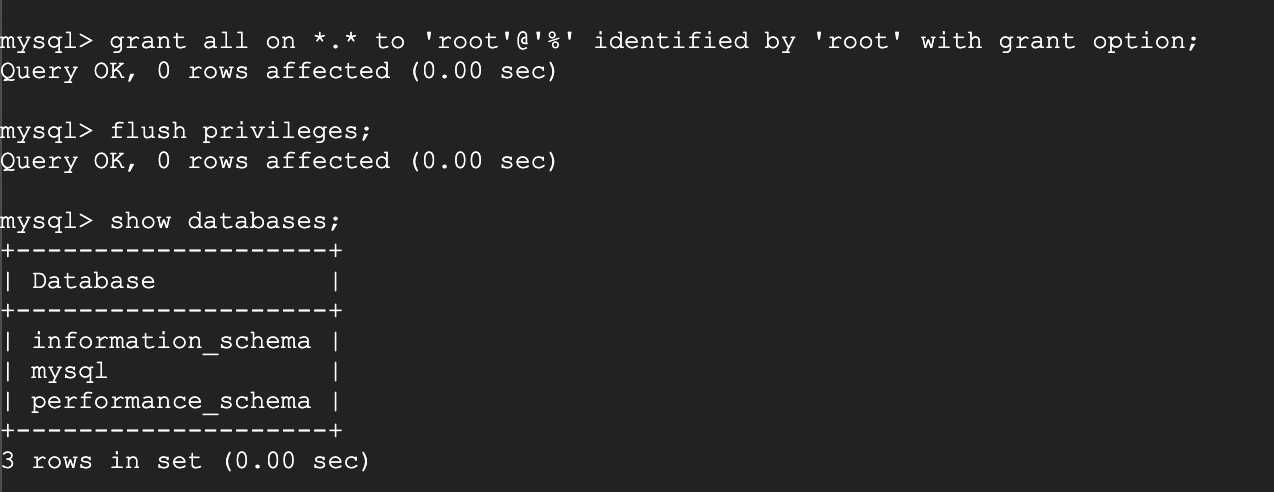

In [18]:
Image('./capture/SQL_03.png')

-------

### spark2 interpreter setup


- spark.hadoop.javax.jdo.option.ConnectionURL
- jdbc:mysql://hadoop-worker-02:3306/metastore_db?createDatabaseIfNotExist=true

-----
- spark.hadoop.javax.jdo.option.ConnectionDriverName
- com.mysql.jdbc.Driver

-----
- spark.hadoop.javax.jdo.option.ConnectionUserName
- root

-----
- spark.hadoop.javax.jdo.option.ConnectionPassword
- root


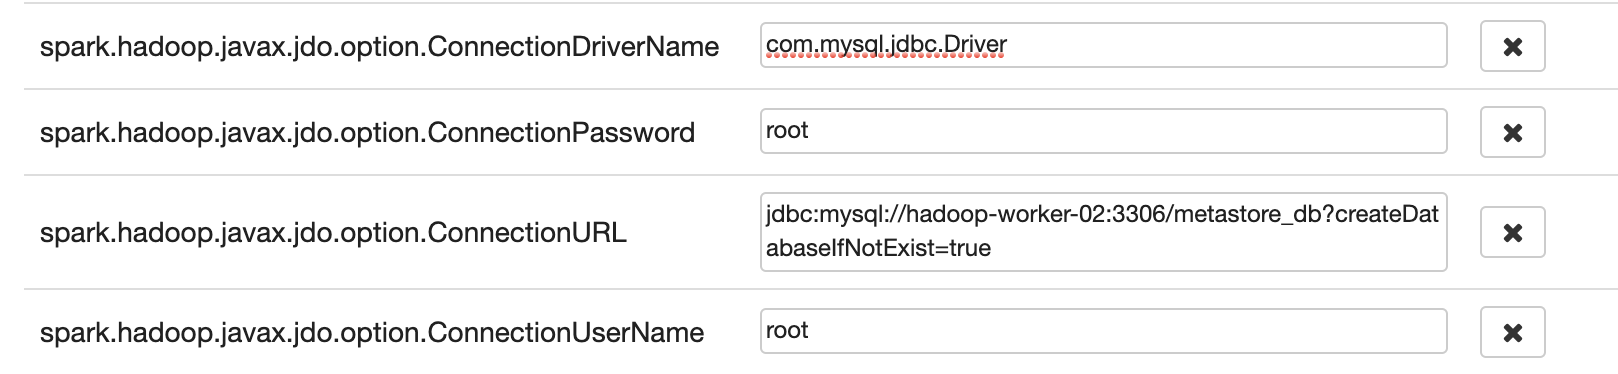

In [19]:
Image('./capture/interpreter_setup.png')

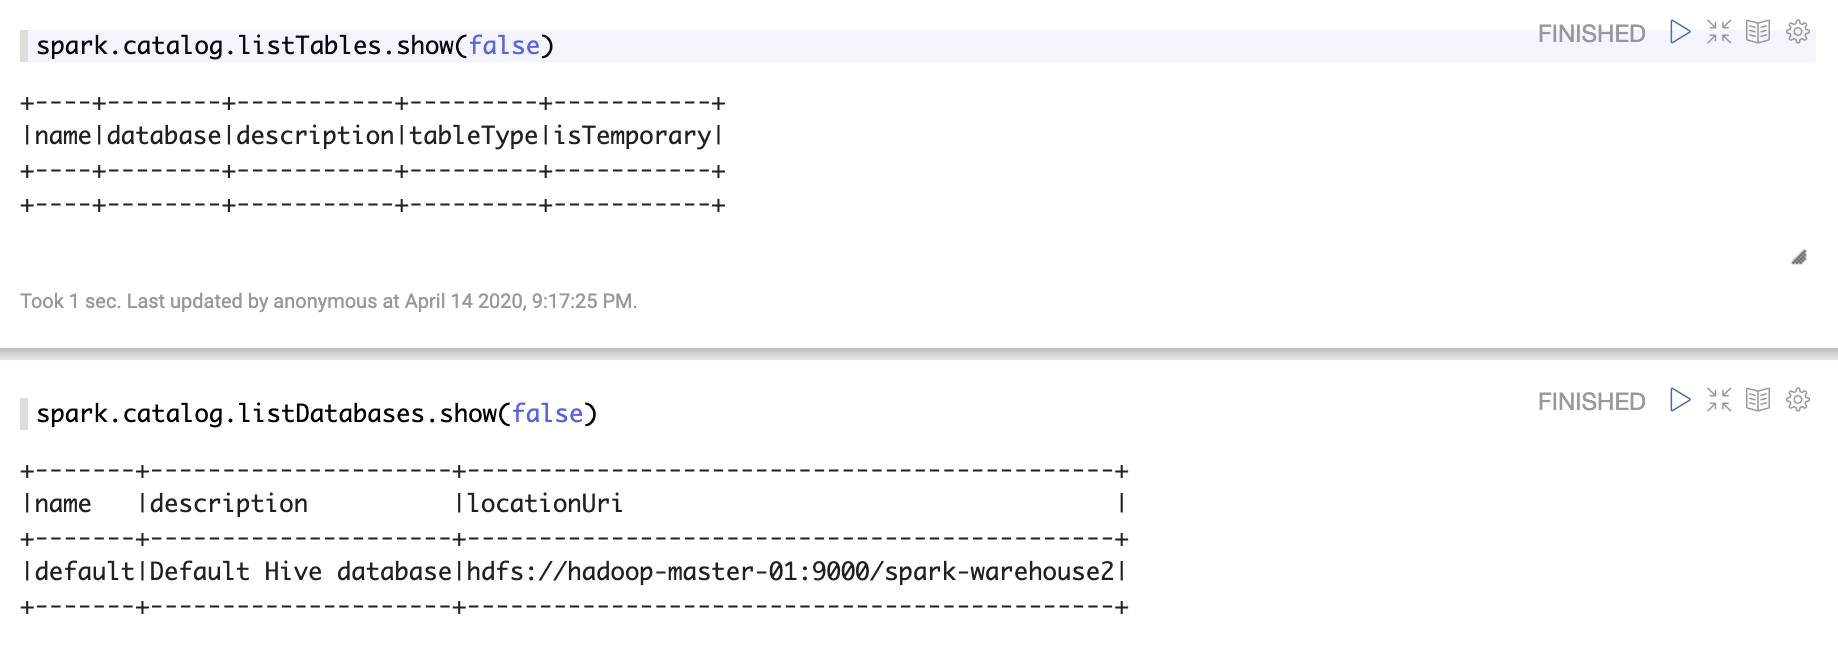

In [20]:
Image('./capture/spark2_list.png')

$ show databases;

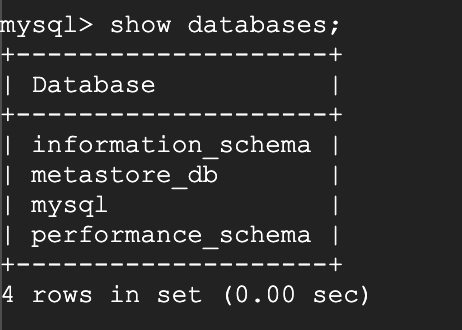

In [22]:
Image('./capture/SQL_04.png')

$ use metastore_db;

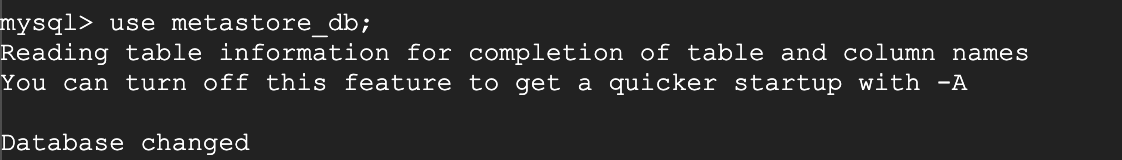

In [24]:
Image('./capture/SQL_05.png')

$ show tables;

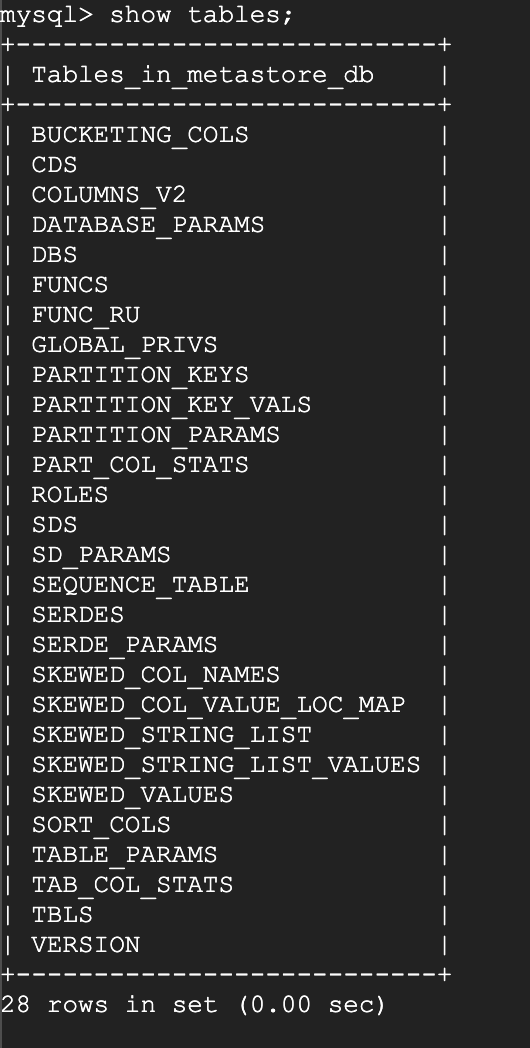

In [25]:
Image('./capture/SQL_06.png')

$ SELECT * FROM TBLS;

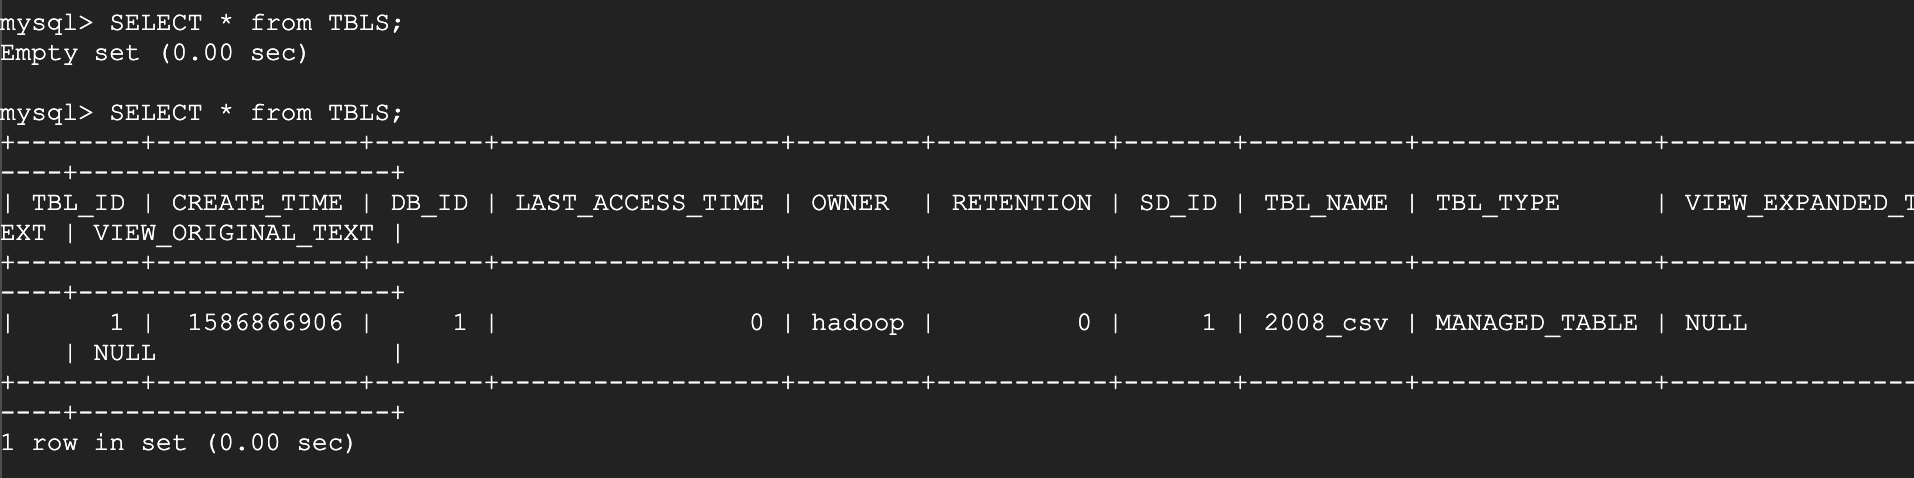

In [26]:
Image('./capture/SQL_07.png')

### spark3 interpreter setup

- spark.sql.warehouse.dir
- hdfs://hadoop-master-01:9000/spark-warehouse2
 
----

- spark.hadoop.javax.jdo.option.ConnectionURL
- jdbc:mysql://hadoop-worker-02:3306/metastore_db?createDatabaseIfNotExist=true

-----
- spark.hadoop.javax.jdo.option.ConnectionDriverName
- com.mysql.jdbc.Driver

-----
- spark.hadoop.javax.jdo.option.ConnectionUserName
- root

-----
- spark.hadoop.javax.jdo.option.ConnectionPassword
- root

-----
- spark.jars
- /kikang/spark2/mysql-connector-java-8.0.19.jar

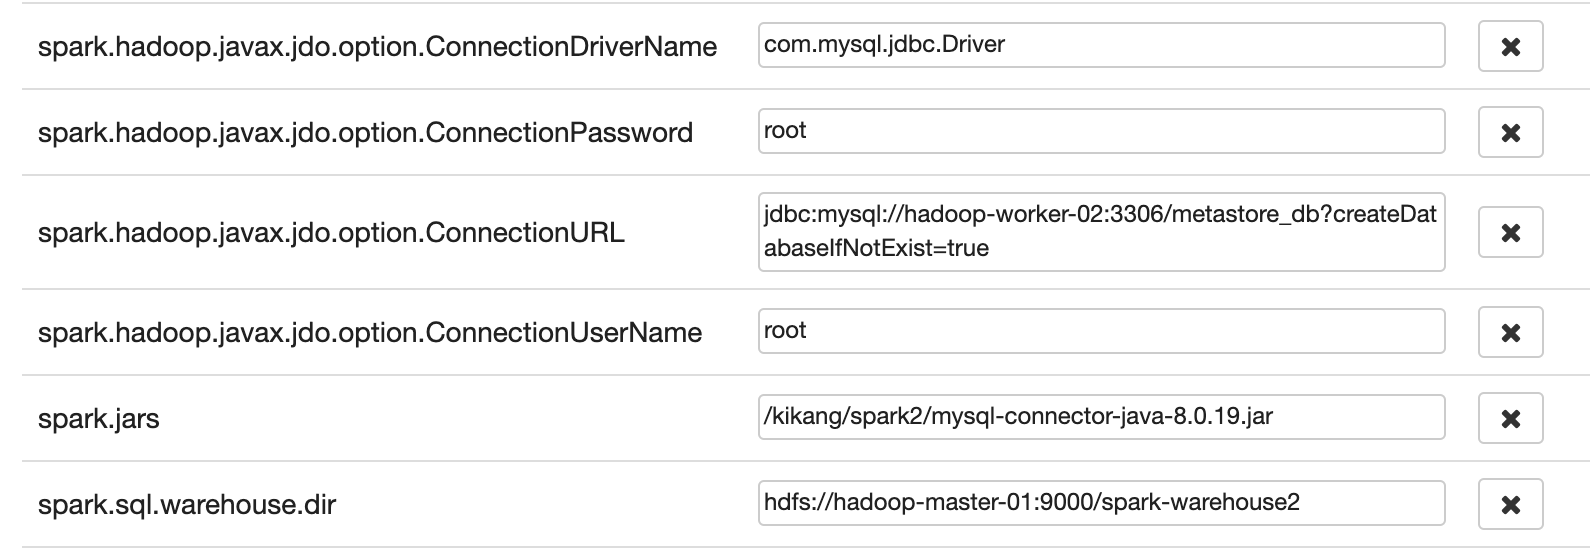

In [23]:
Image('./capture/spark3_setup.png')

    %spark3
    spark.catalog.listDatabases.show(false)

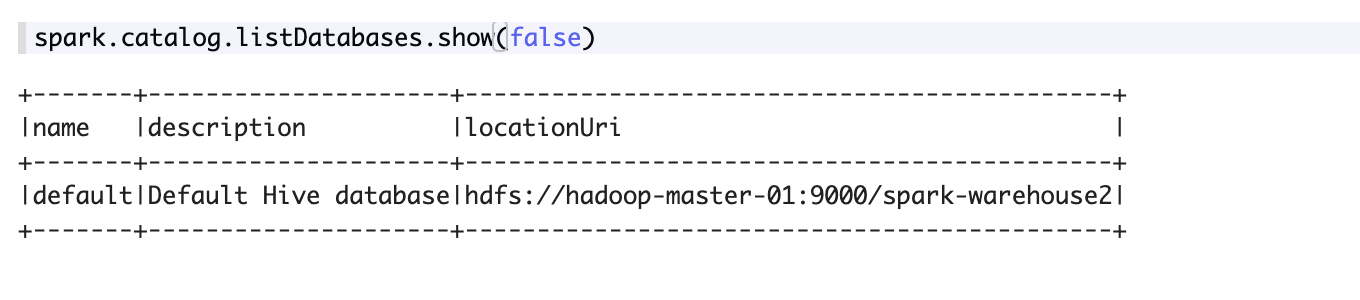

In [28]:
Image("./capture/spark_listdata.png")

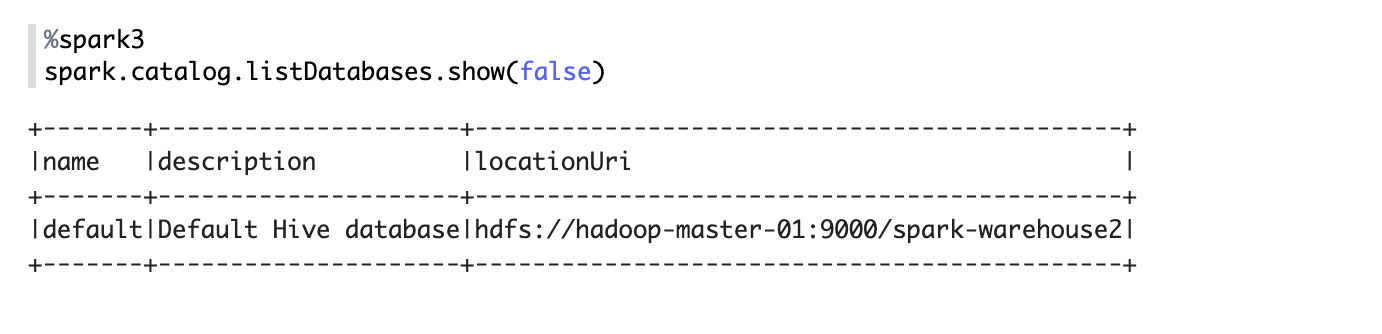

In [27]:
Image('./capture/spark3_listdata.png')

------
### 윈도우 연산

 - 창으로 데이터를 나누고 그 안에 포함되어 있는 데이터로만 집계\
 ex) groupby
 
 - window : 단순 통계 및 연산에 사용 (SQL에서 사용)
     1. 데이터 중심 
     2. 시간 중심

------
### TEST database

val customers_list = List(
                ("Alice", "2016-05-01", 50.00), 
                ("Alice", "2016-05-03", 45.00), 
                ("Alice", "2016-05-04", 55.00), 
                ("Bob", "2016-05-01", 25.00), 
                ("Bob", "2016-05-04", 29.00), 
                ("Bob", "2016-05-06", 27.00)
            )
            
- val rdd = sc.parallelize(customers_list)
- rdd.count
- rdd.take(1)
- val df = rdd.toDF
- df.printSchema
- val customers = df.toDF("name","date","amountSpent")
- customers.printSchema
- customers.show

#### rdd 를 만드는 API : PARALLELIZE (병렬화)

- List : driver에 저장
- sc.parallelize == 분산
-----


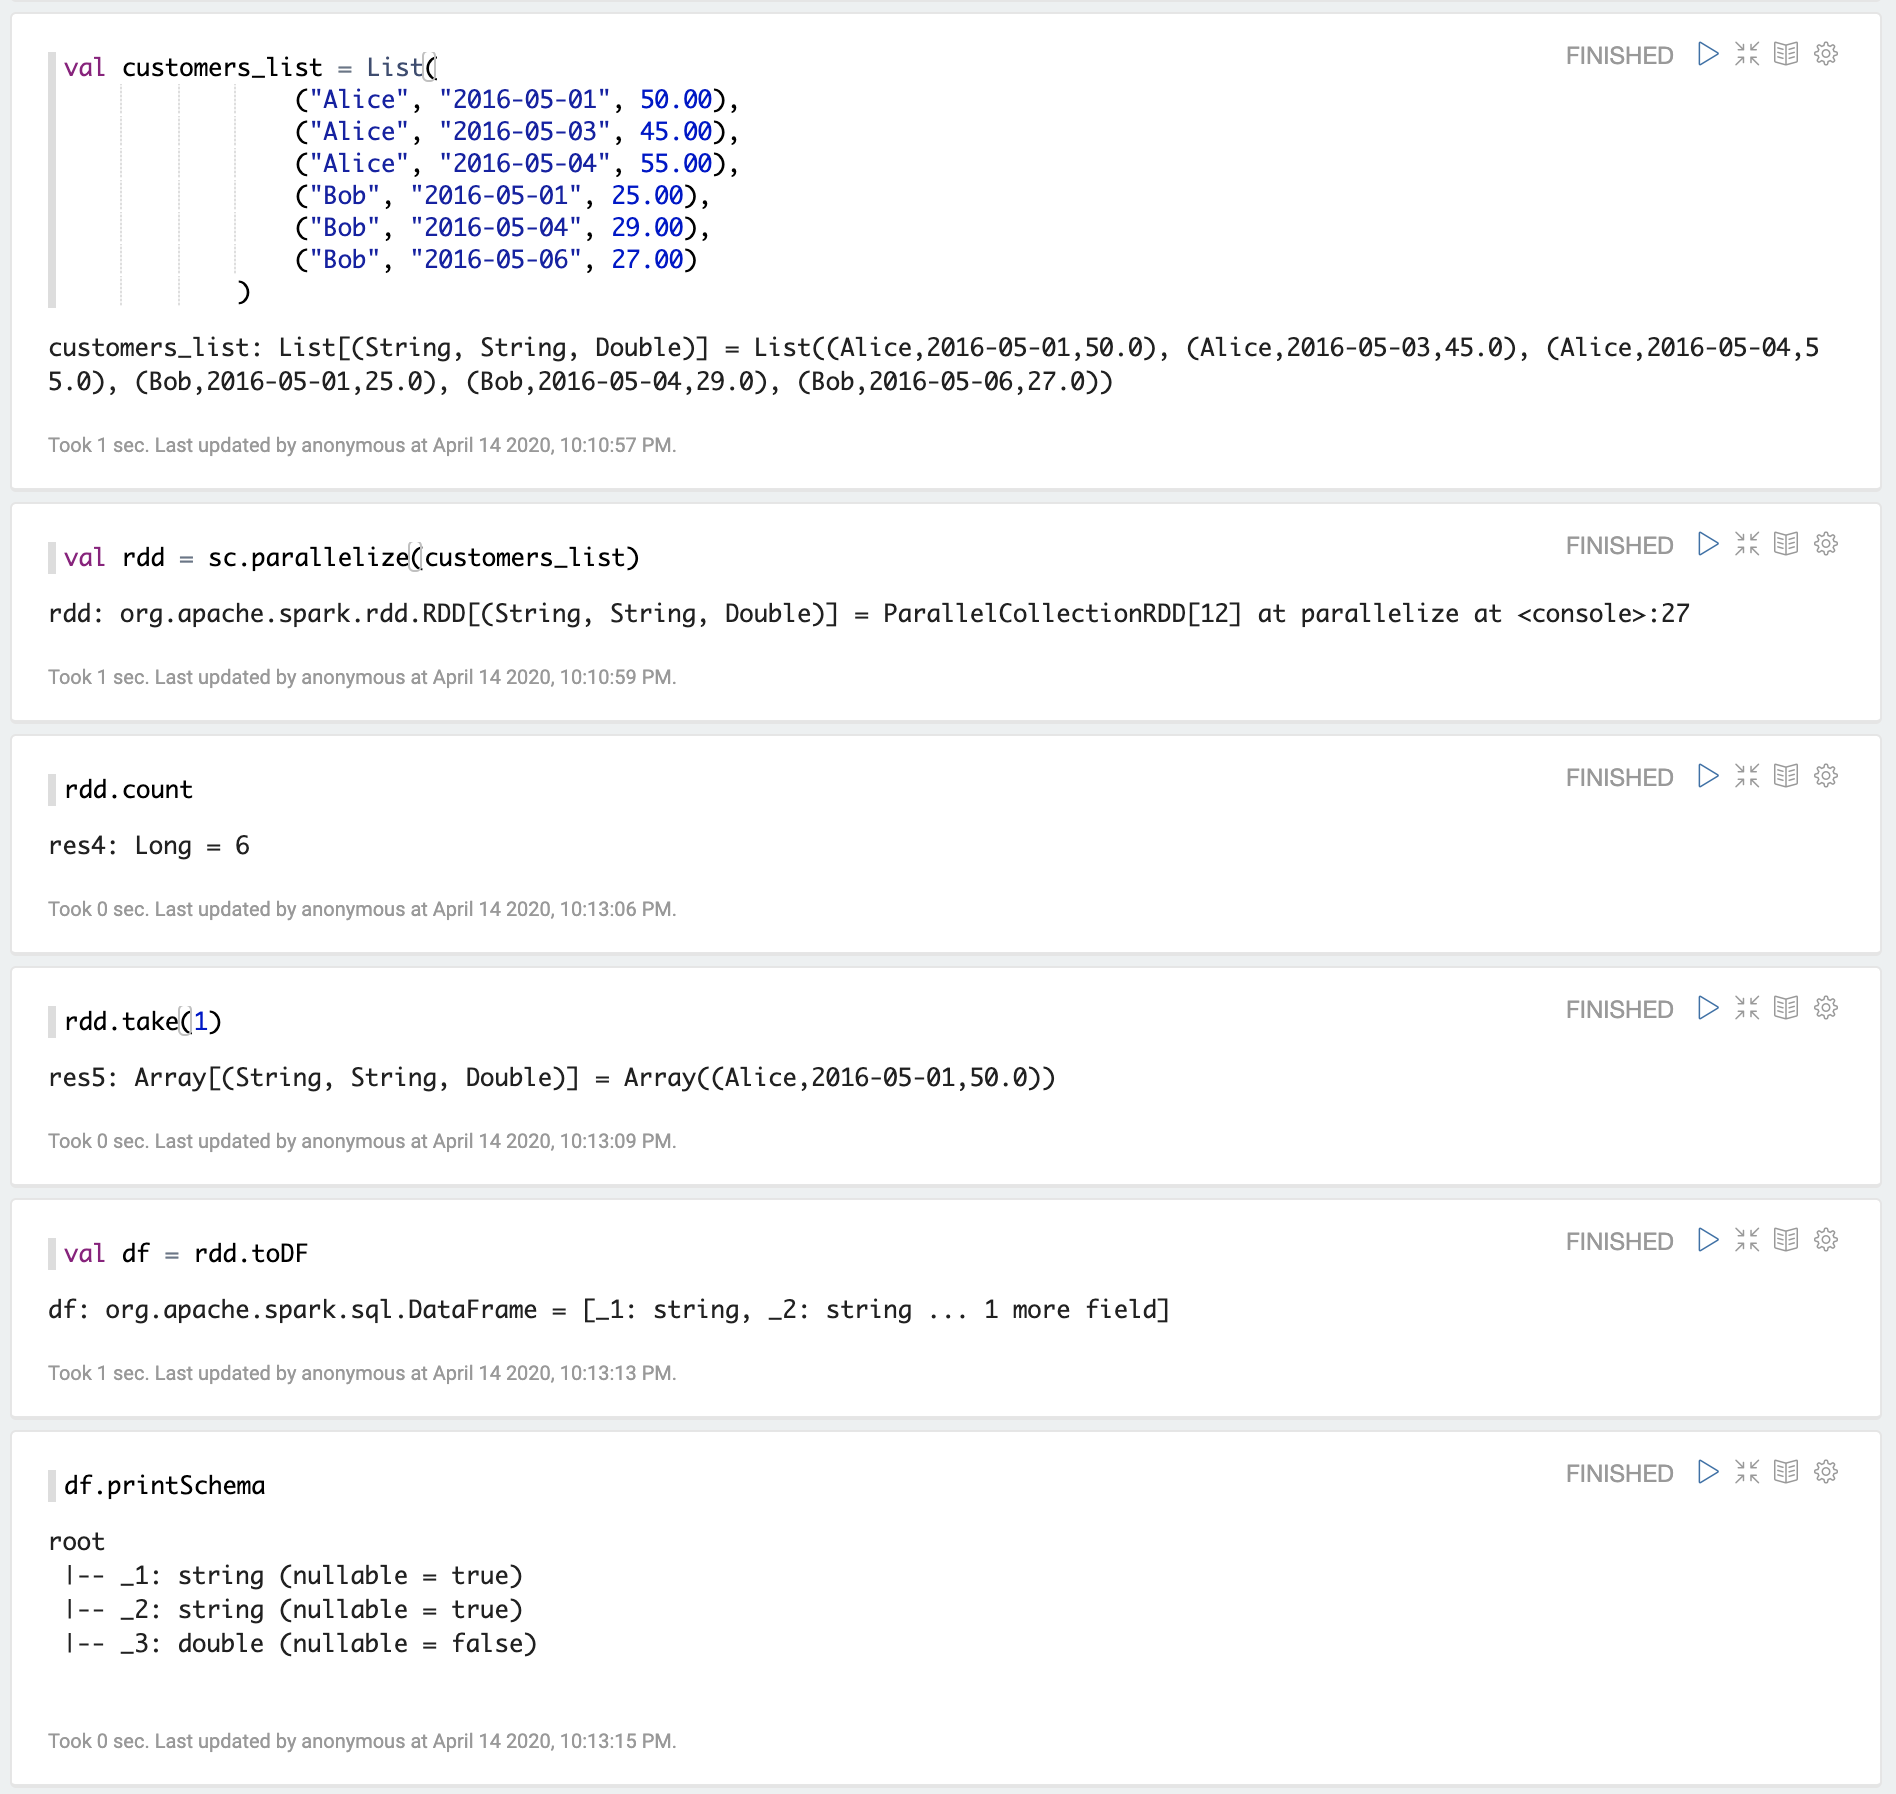

In [29]:
Image('./capture/window_01.png')

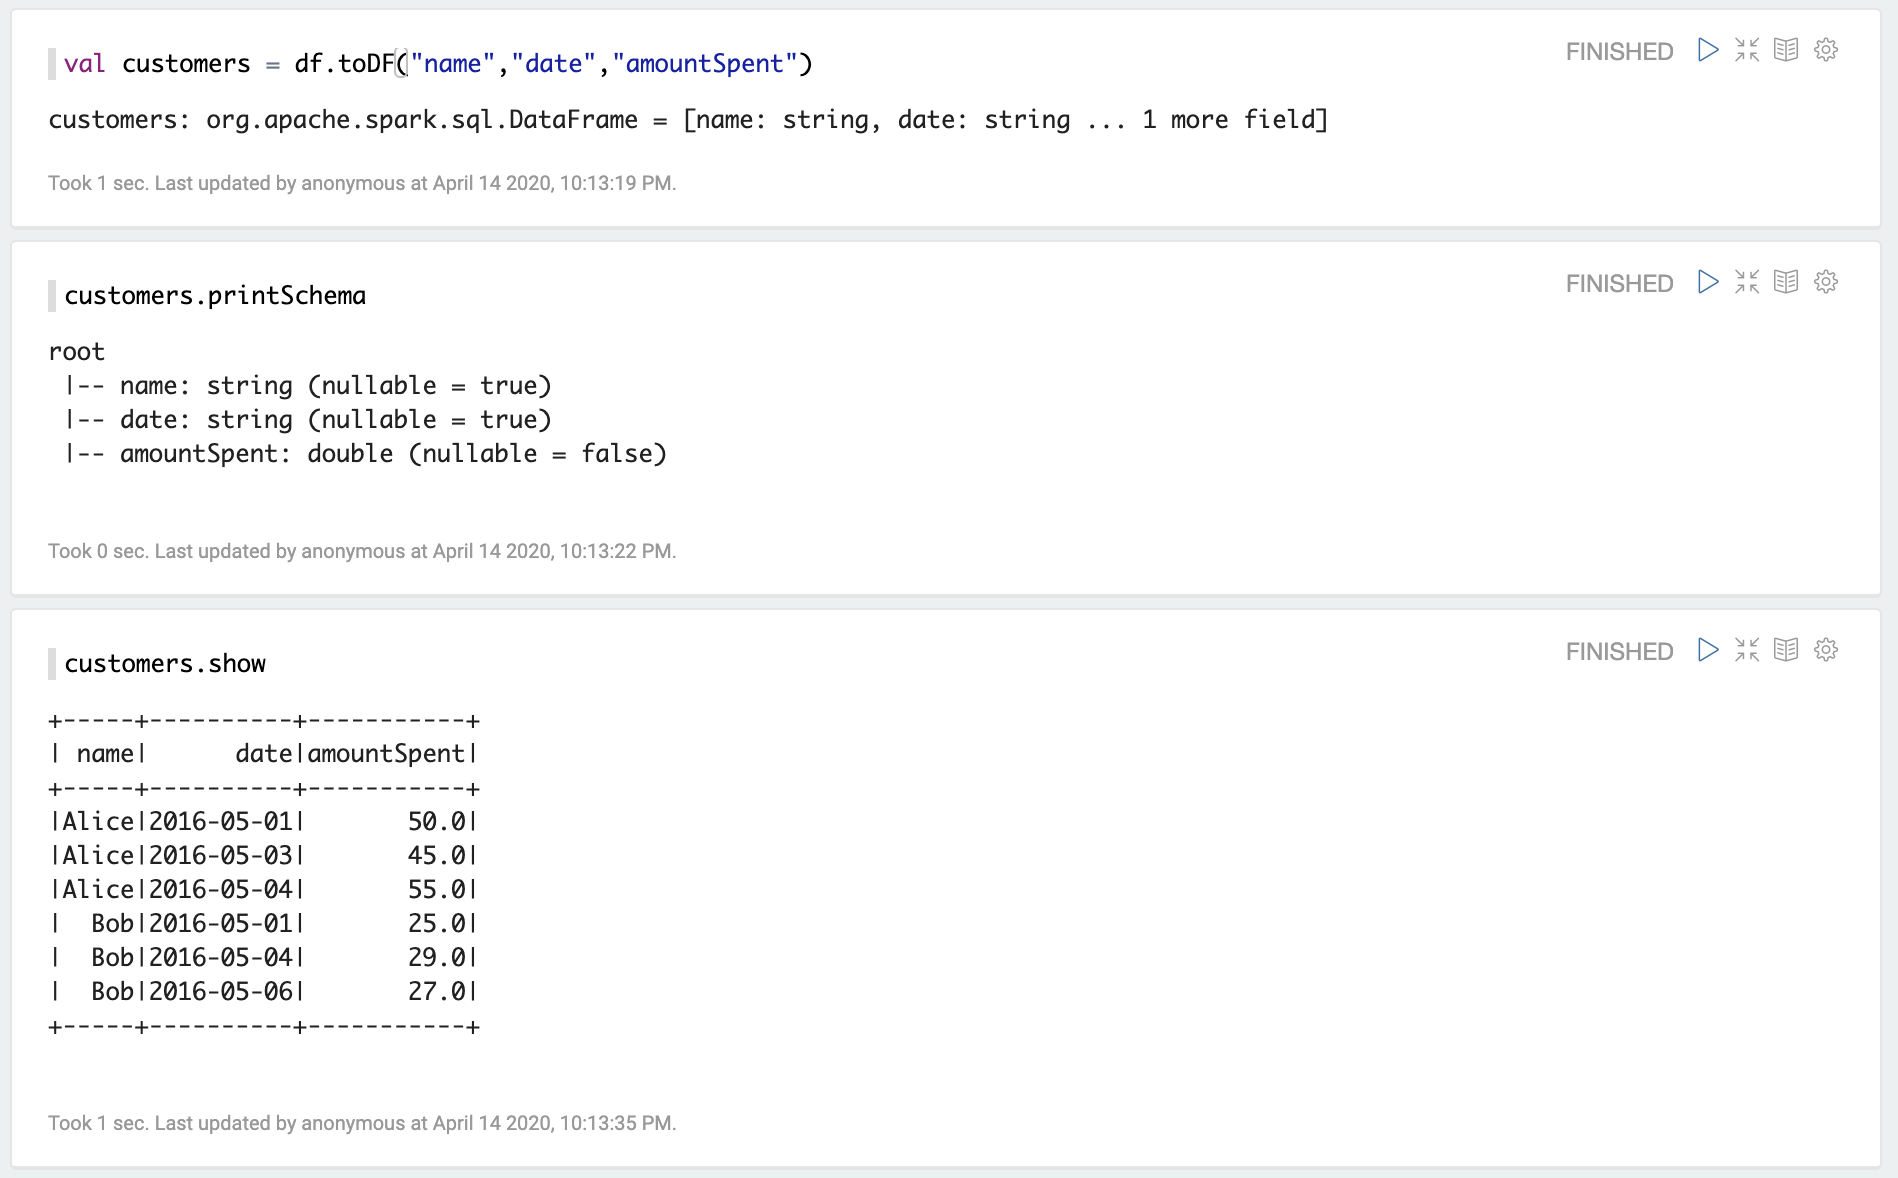

In [30]:
Image('./capture/window_02.png')

#### window function import


import org.apache.spark.sql.expressions.Window\
import org.apache.spark.sql.functions._ 


------
#### 창 정의

- val wSpec1 = Window.partitionBy("name").orderBy("date").rowsBetween(-1, 1)

 --> rows : 테이블 하나하나의 위치\
 (-1,1) : 현재 앞 1개 , 현재 값 뒤에 1개  == 3개를 창 1개에 넣음
 

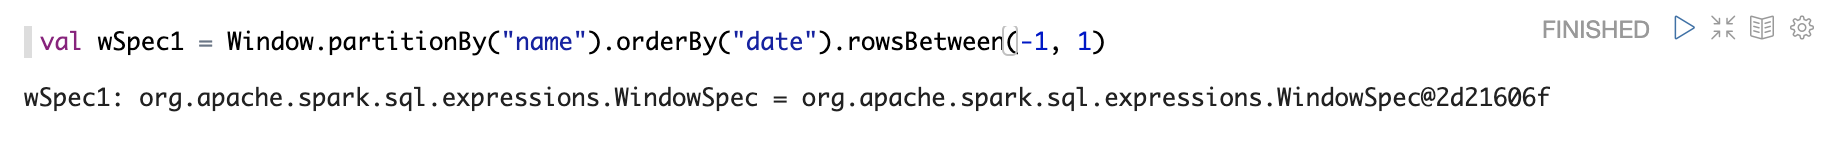

In [31]:
Image('./capture/window_03.png')

- customers.withColumn("movingAvg", avg(customers("amountSpent")).over(wSpec1)).show()

 --> WindowSpec을 기준으로 Avg를 하겠다. 

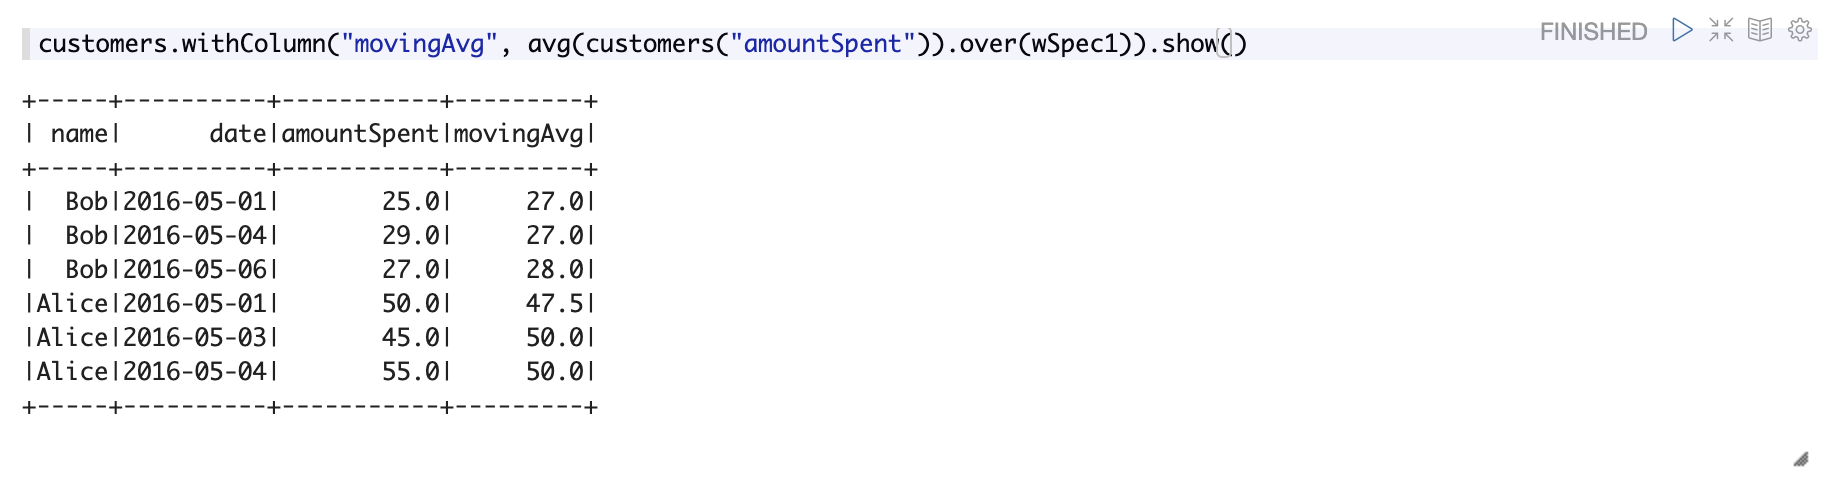

In [32]:
Image('./capture/window_04.png')

#### 현재위치

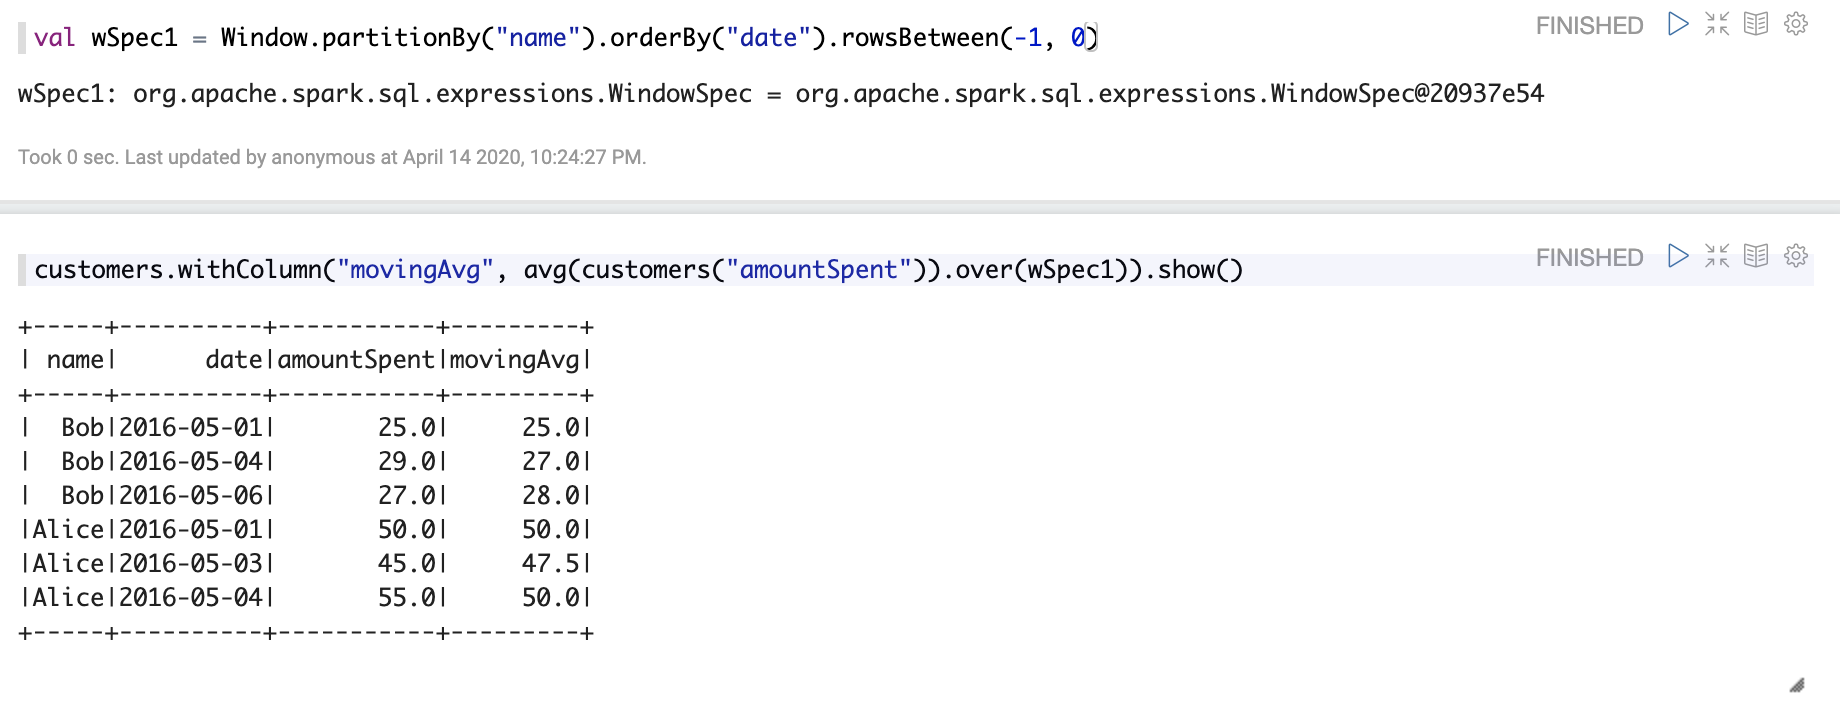

In [33]:
Image('./capture/window_05.png')

#### TotalAvg 
- customers.withColumn("totalAvg", avg(customers("amountSpent")).over()).show()

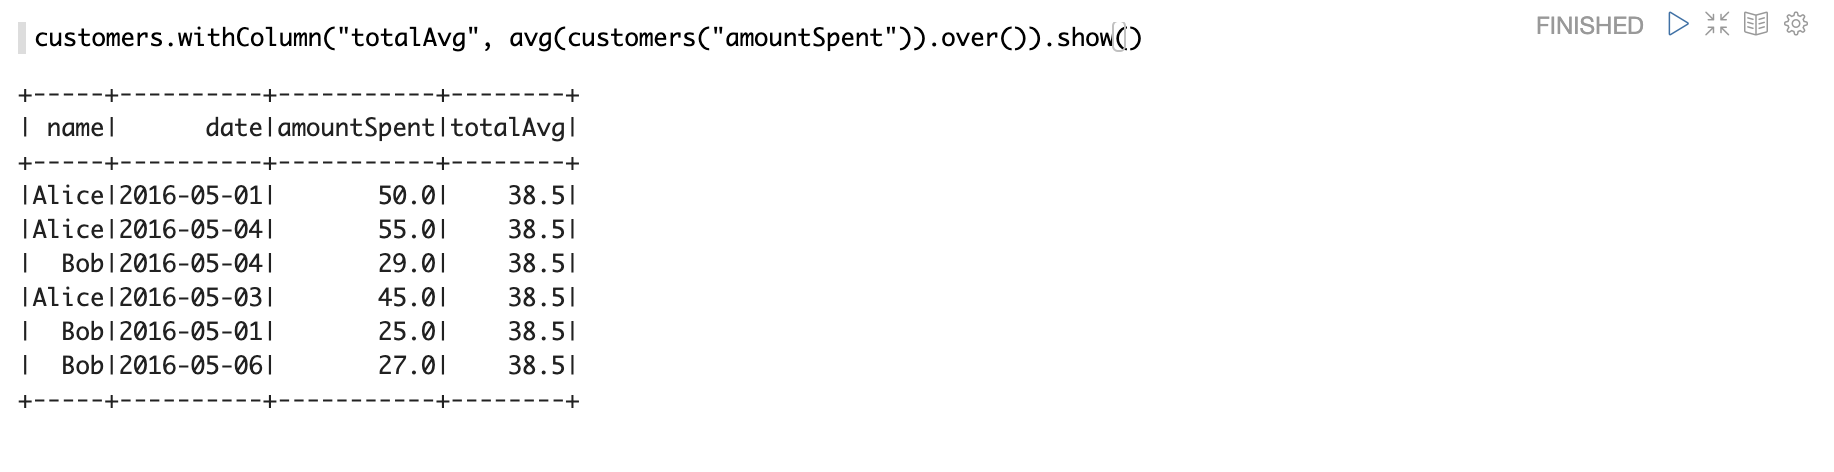

In [34]:
Image('./capture/window_06.png')

#### Window.partitionBy("name") : name GroupBy

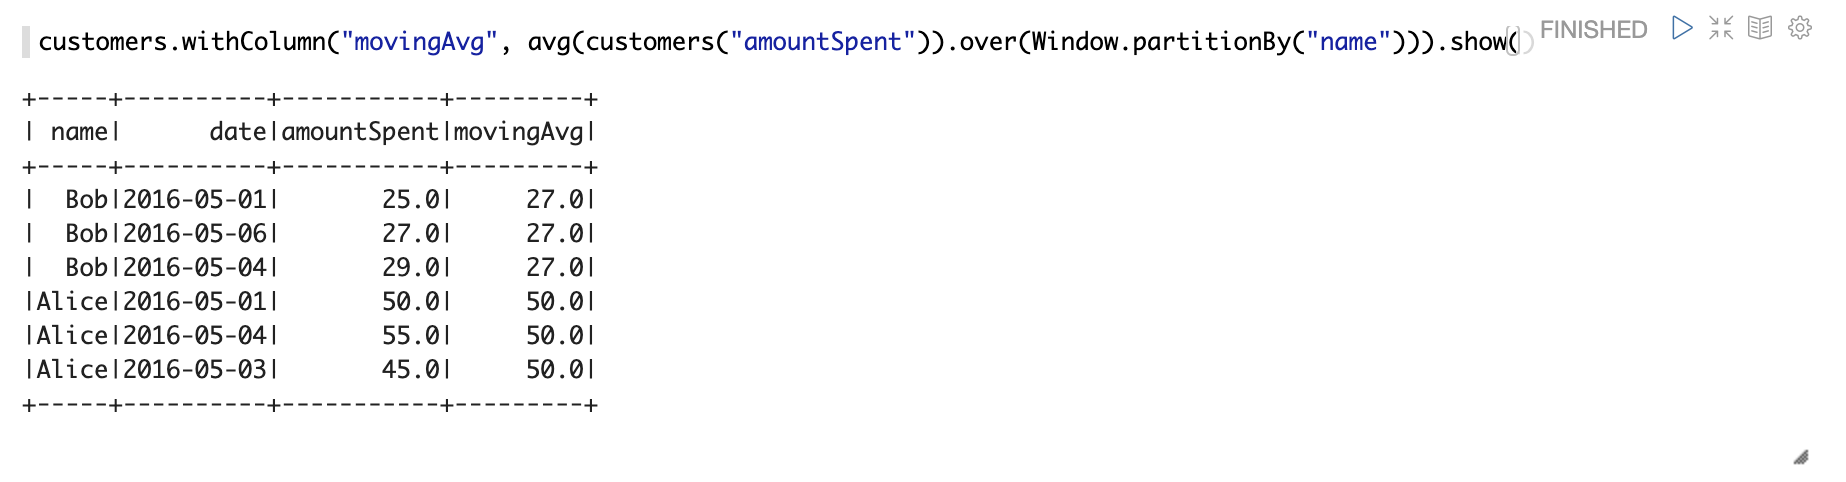

In [35]:
Image('./capture/window_07.png')

### rangeBetween

- val wSpec2 = Window.partitionBy("name").orderBy("amountSpent")

    customers.select(
            $"name", 
            $"date", 
            $"amountSpent", 
            sum("amountSpent").over(wSpec2.rangeBetween(Window.currentRow, 5)).as("range"), 
            avg("amountSpent").over(wSpec2.rowsBetween(Window.currentRow, 1)).as("rows")
        ).show()

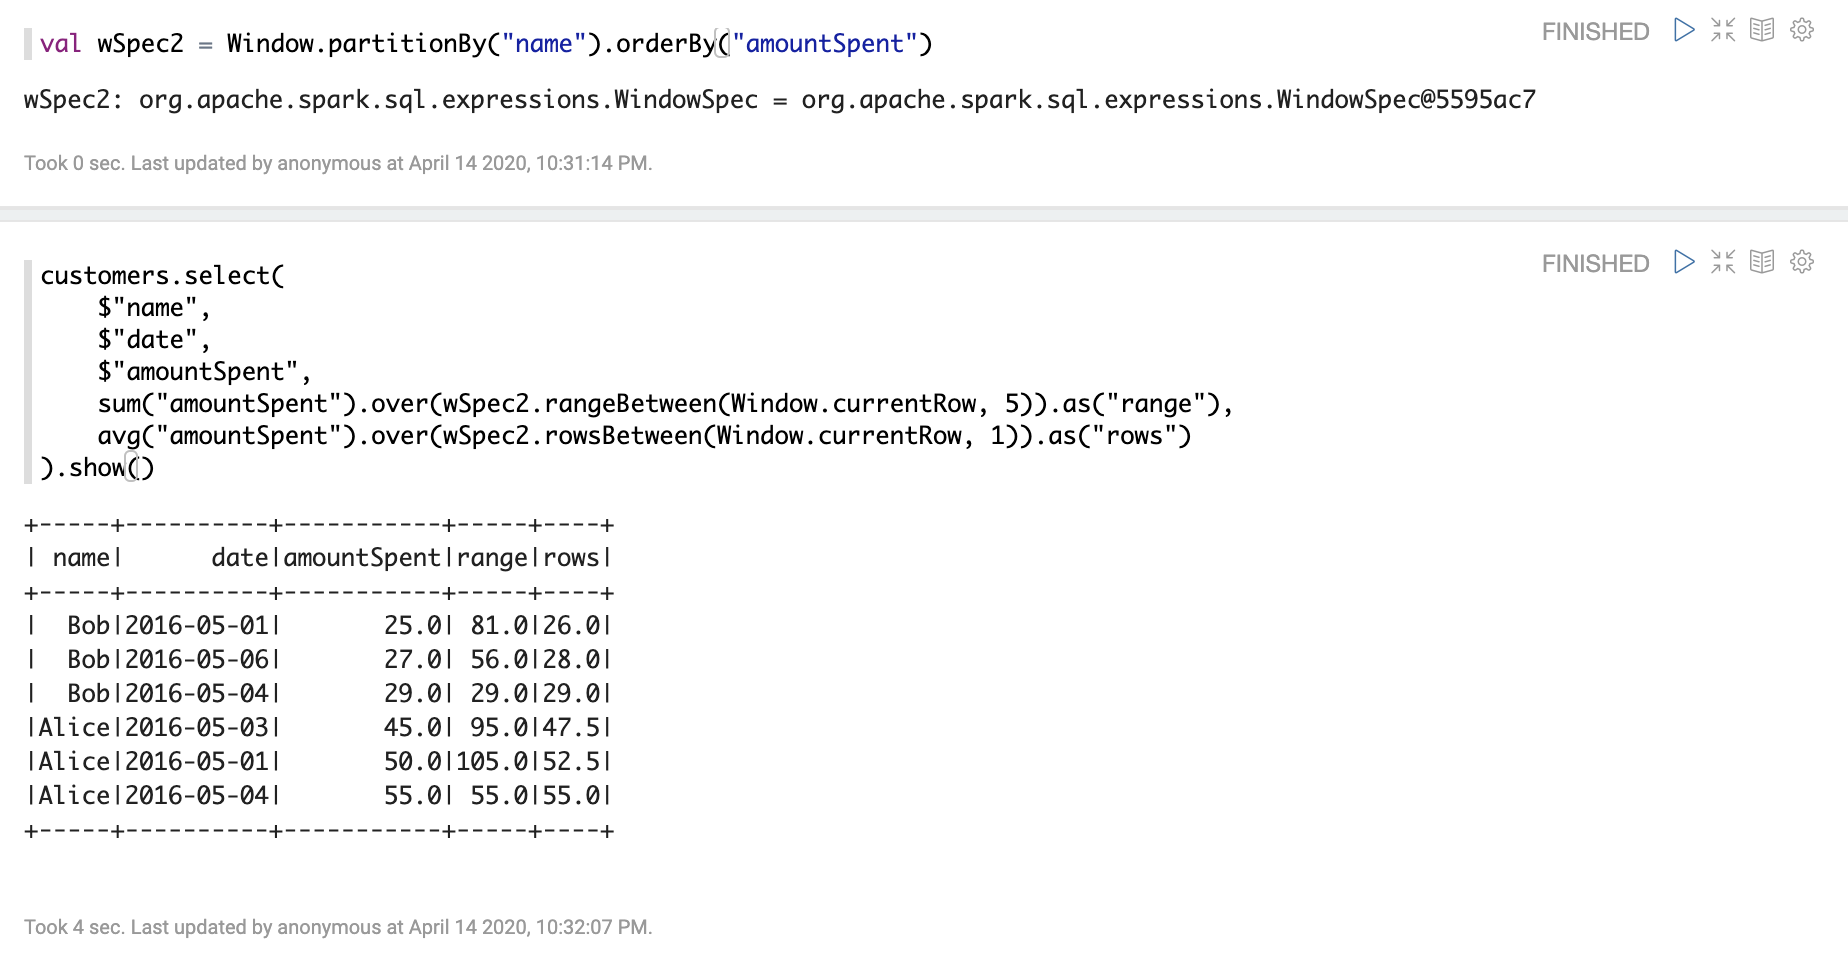

In [36]:
Image('./capture/window_08.png')

- rangeBetween(Window.currentRow, 5) : 현재값 +5
- rowsBetween(Window.currentRow, 1) : 위치 +1

### RowBetween

    customers.select(
        $"name", 
        $"date", 
        $"amountSpent", 
        sum("amountSpent").over(wSpec2.rangeBetween(Window.currentRow, 5)).as("range"), 
        avg("amountSpent").over(wSpec2.rowsBetween(Window.currentRow, 1)).as("rows"), 
        avg("amountSpent").over(wSpec1).as("rows2"), 
        sum("amountSpent").over(Window.orderBy($"amountSpent".desc).rangeBetween(Window.currentRow, 5)).as("range2")).show()
    
----- 
- orderBy DESC.... => rangeBetween MINUS....

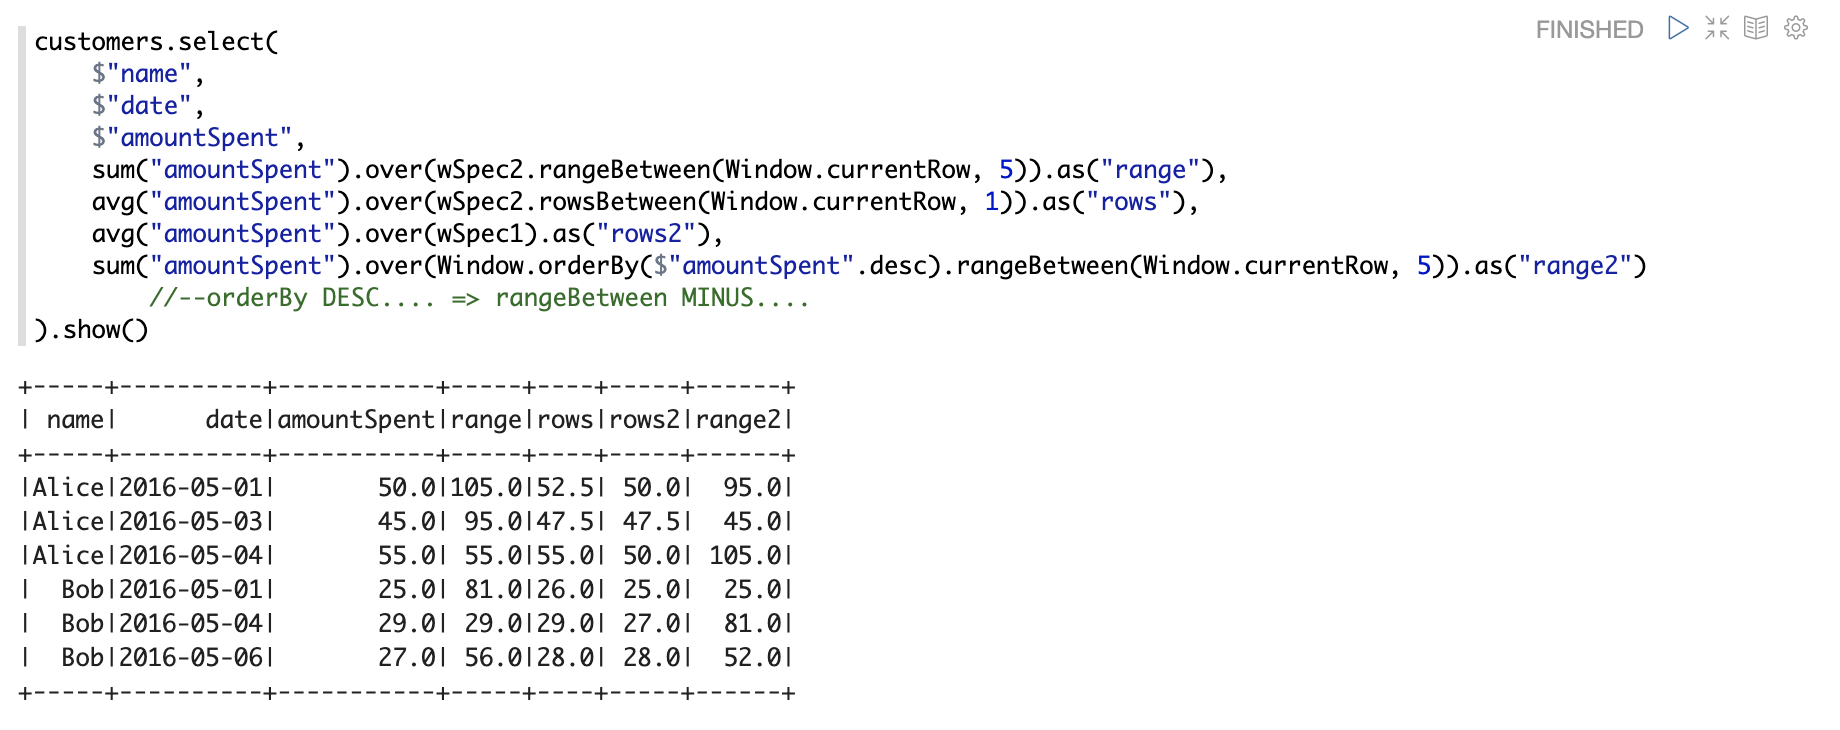

In [2]:
Image('./capture/01_window.png')

- window연산은 ms을 지원하지 않음. 
- spark.api.org에서 확인 가능 

-----

    val customers = sc.
        parallelize(
            List(
                ("Alice", "2019-07-12 11:02:31.147", 50.00), 
                ("Alice", "2019-07-12 11:02:31.199", 45.00), 
                ("Alice", "2019-07-12 11:02:31.214", 55.00), 
                ("Bob", "2019-07-12 13:02:31.114", 25.00), 
                ("Bob", "2019-07-12 13:02:31.169", 29.00), 
                ("Bob", "2019-07-12 13:02:31.198", 27.00)
            )
        ).
        toDF("name", "date", "amountSpent")
------

    val customers2 = customers.
        withColumn("unix_timestamp", unix_timestamp('date, "yyyy-MM-dd HH:mm:ss.SSS")).
        withColumn("timestamp", 'unix_timestamp.cast("timestamp"))
        
-------

    val customers3 = customers2.
        withColumn("timestamp2", to_timestamp('date, "yyyy-MM-dd HH:mm:ss.SSS"))

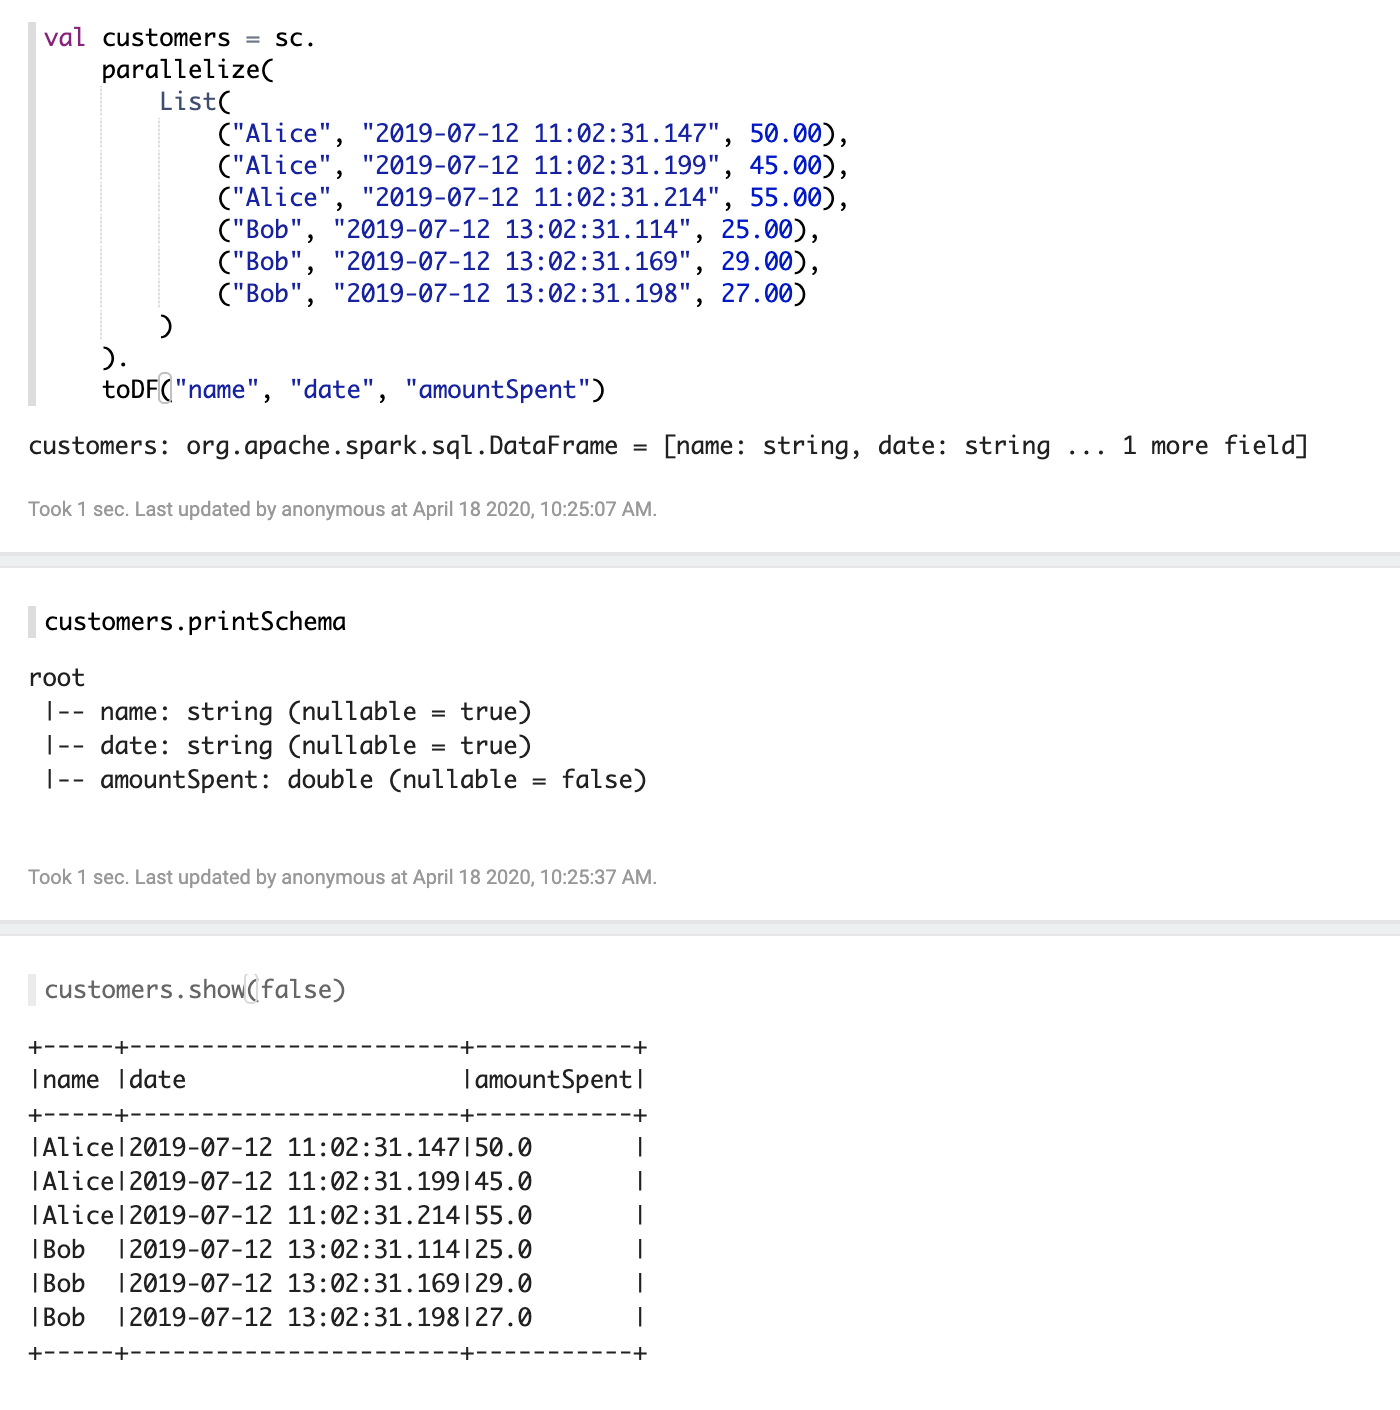

In [4]:
Image('./capture/07_window.png')

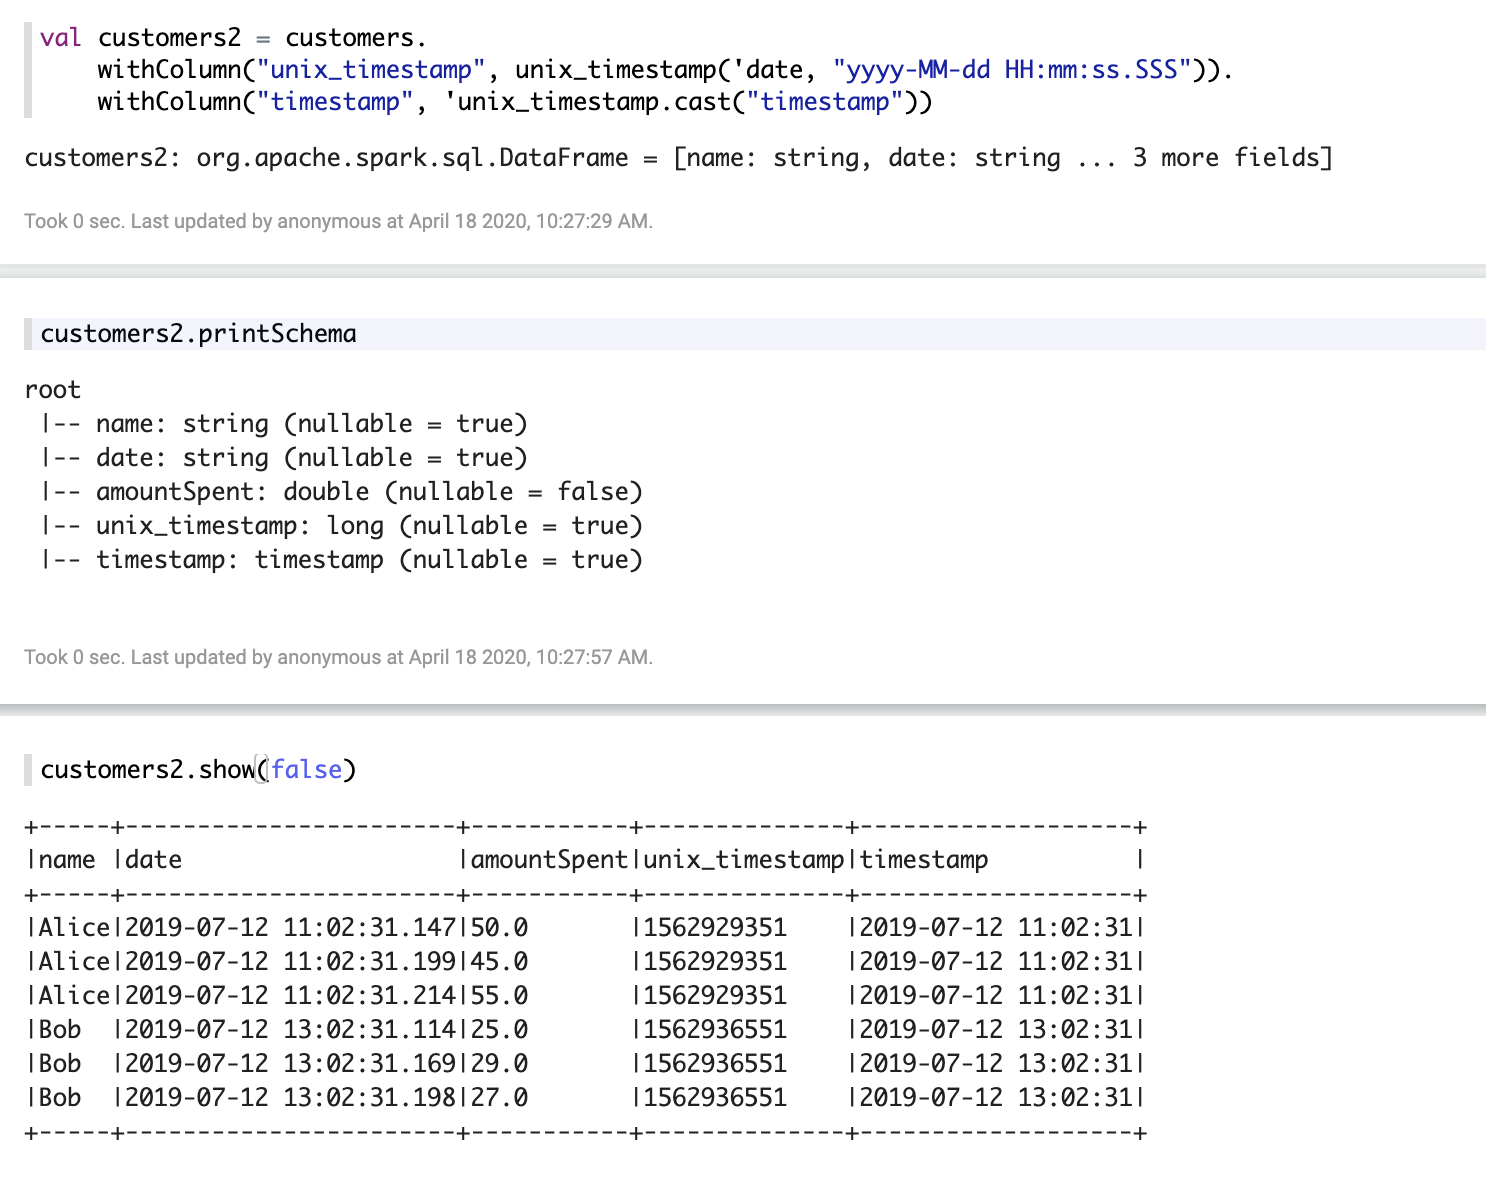

In [5]:
Image('./capture/08_window.png')

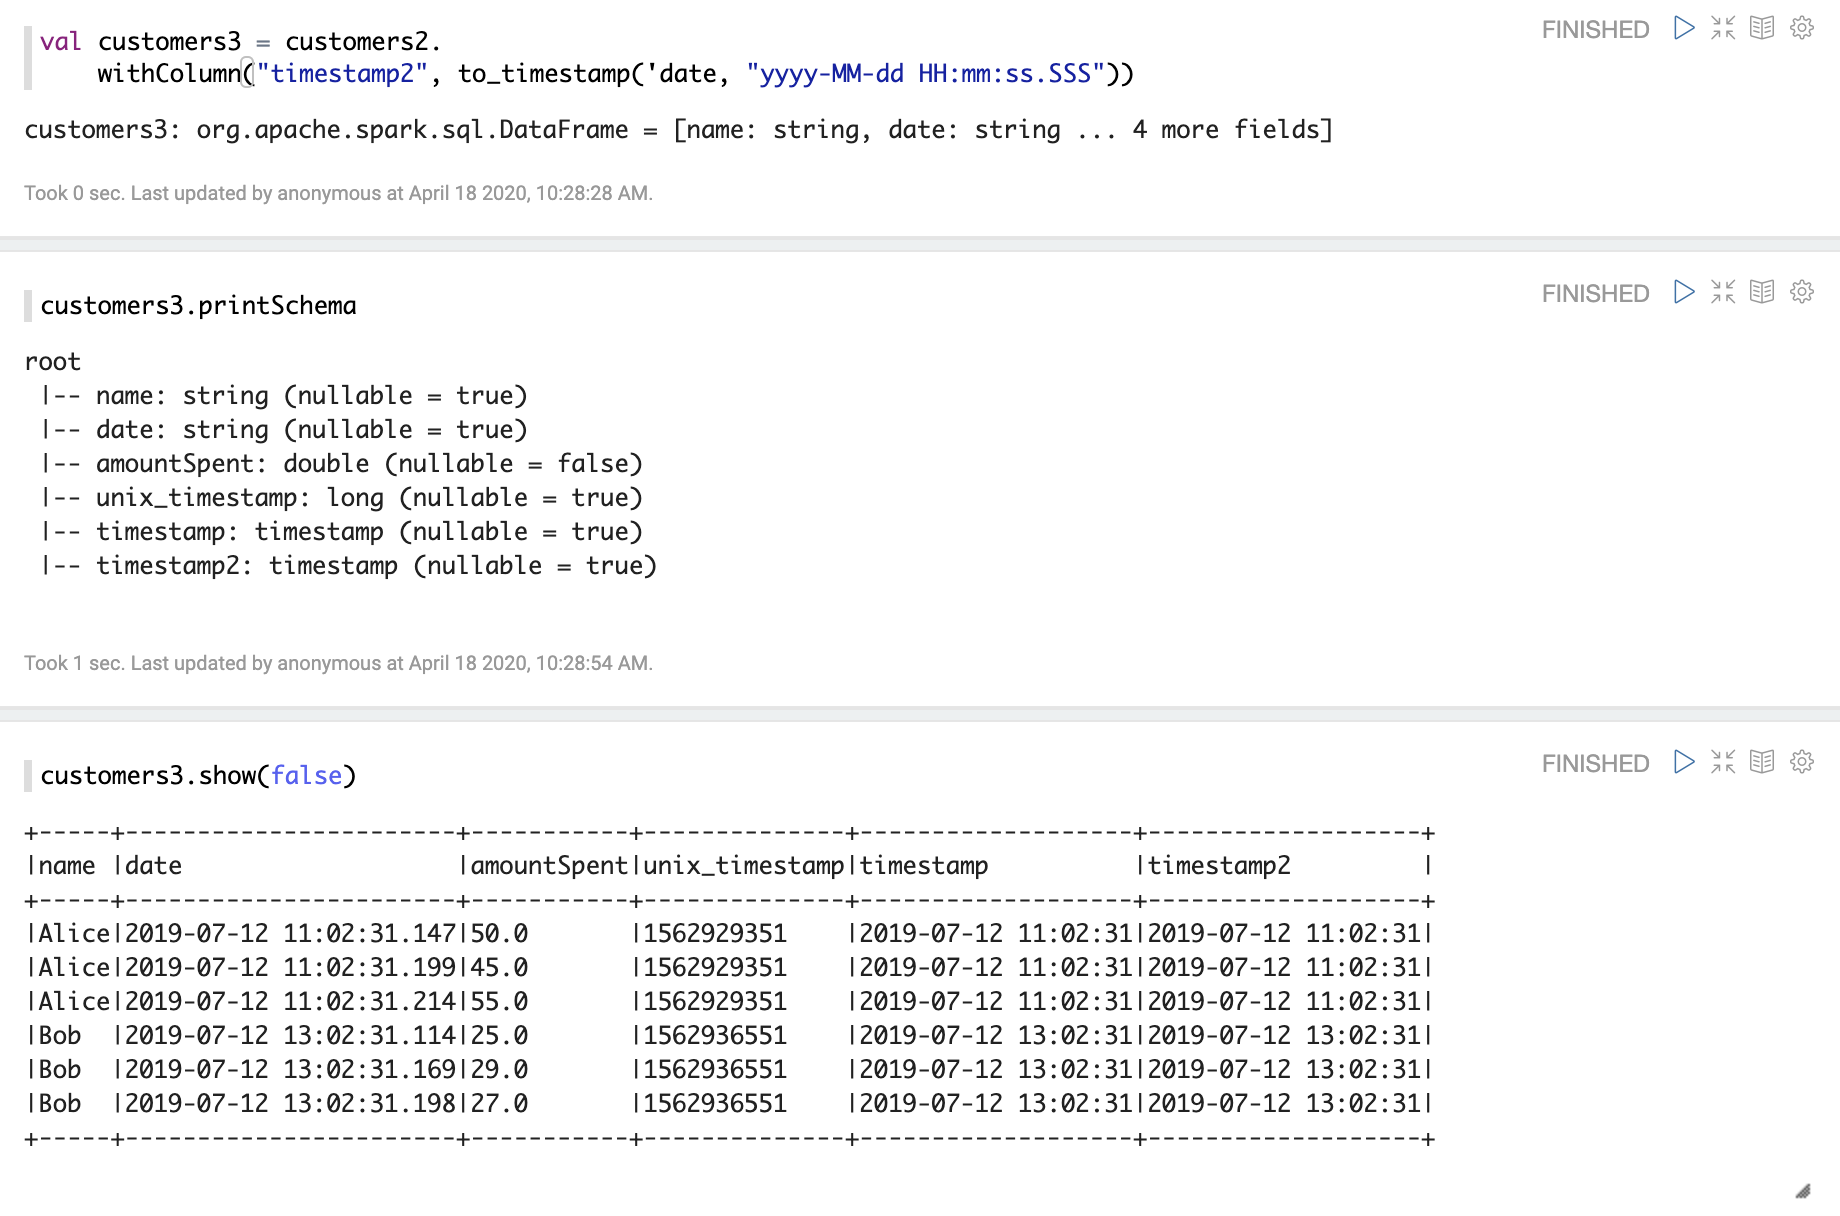

In [6]:
Image('./capture/09_window.png')

$ import java.text.SimpleDateFormat

$ import java.sql.Timestamp

- java 는 ms을 지원하기 때문에 import 시켜서 사용

----
#### 함수 생성

    val to_timestamp_millisecond = spark.udf.register("to_timestamp_millisecond", (date: String) => {
        val simpleDateFormat = new SimpleDateFormat("yyyy-MM-dd HH:mm:ss.SSS")
        new Timestamp(simpleDateFormat.parse(date).getTime)})
        
  - 스칼라와 자바코드를 혼용해서 사용
  - 스칼라는 return 이 없고 제일 마지막에 있는 것을 return\
      : return UserDefinedFunction

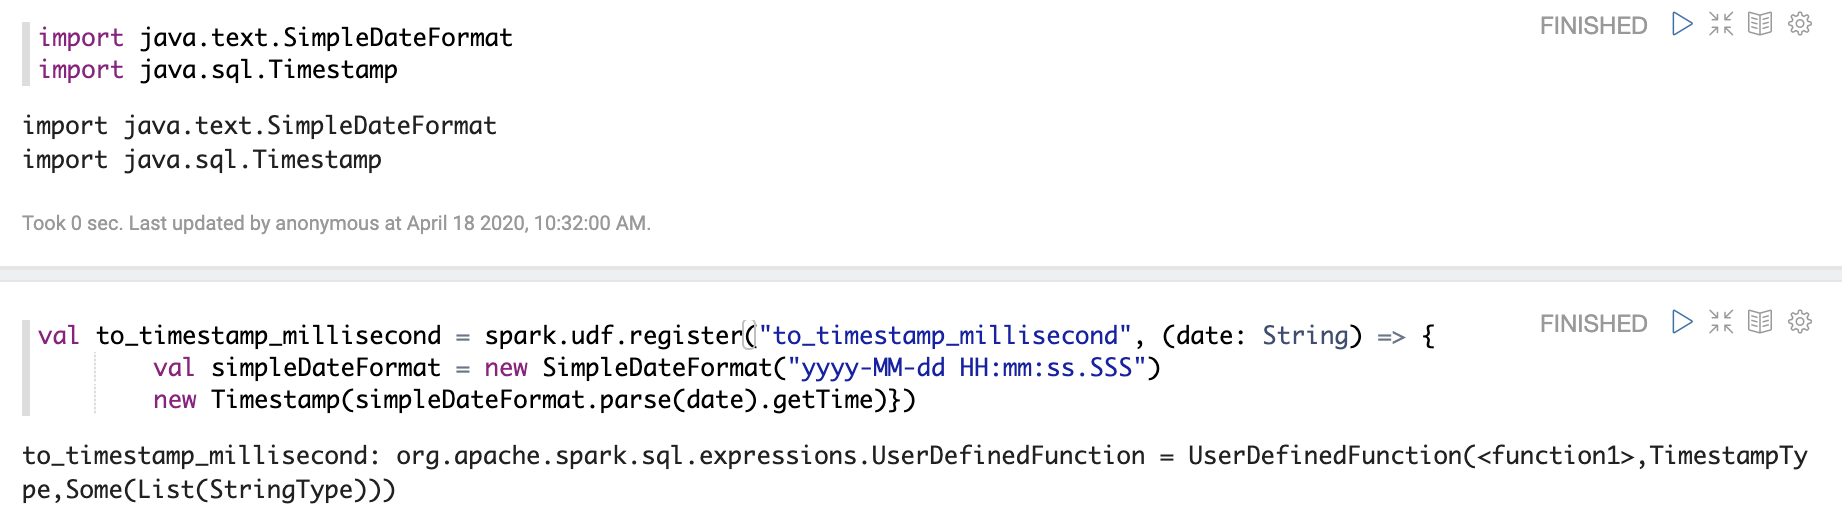

In [7]:
Image('./capture/10_window.png')

    val customers4 = customers3.
        withColumn("timestamp3", to_timestamp_millisecond('date))

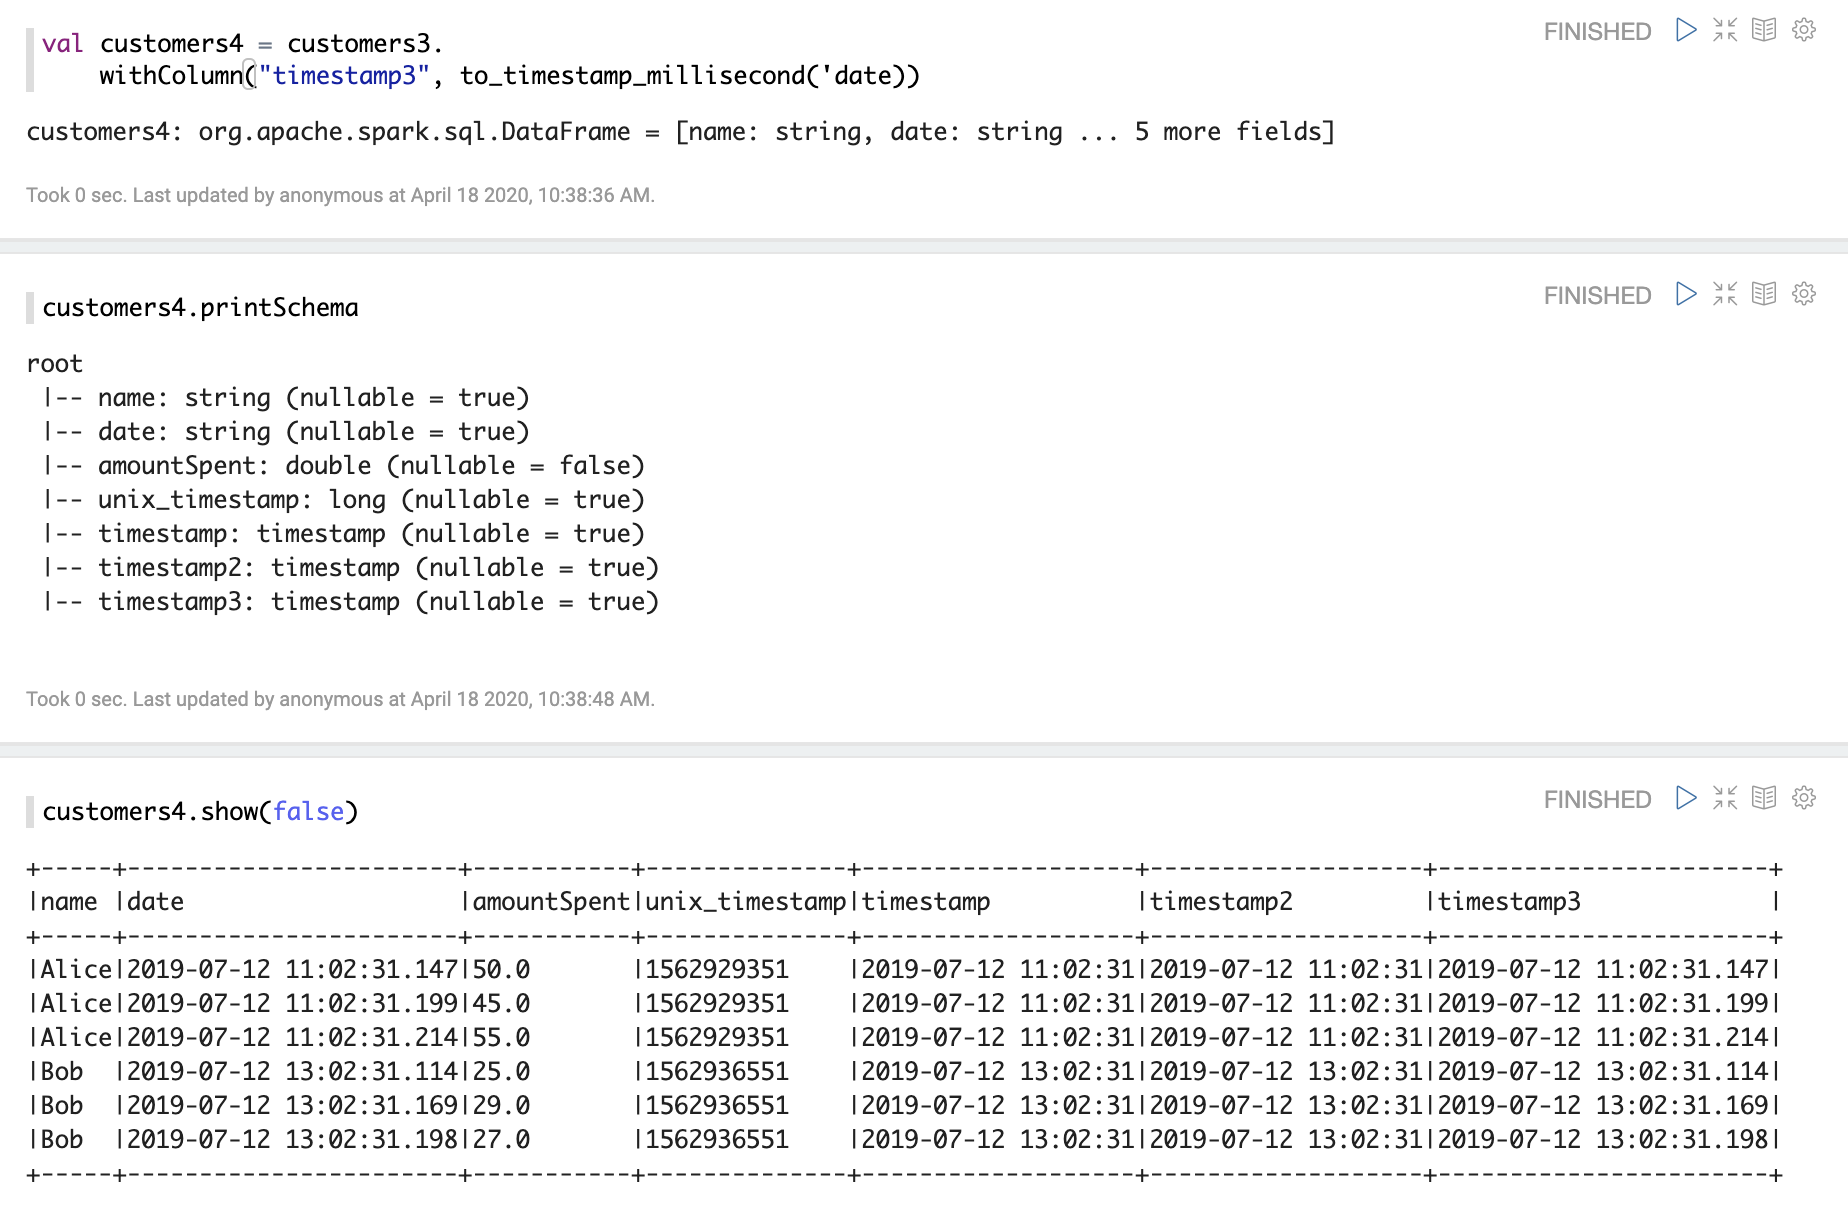

In [8]:
Image('./capture/11_window.png')

-----

    customers4.
        groupBy($"name", window($"timestamp3", "50 milliseconds")).
        agg(mean("amountSpent"), sum("amountSpent")).
        orderBy('name, 'window).
        show(false)

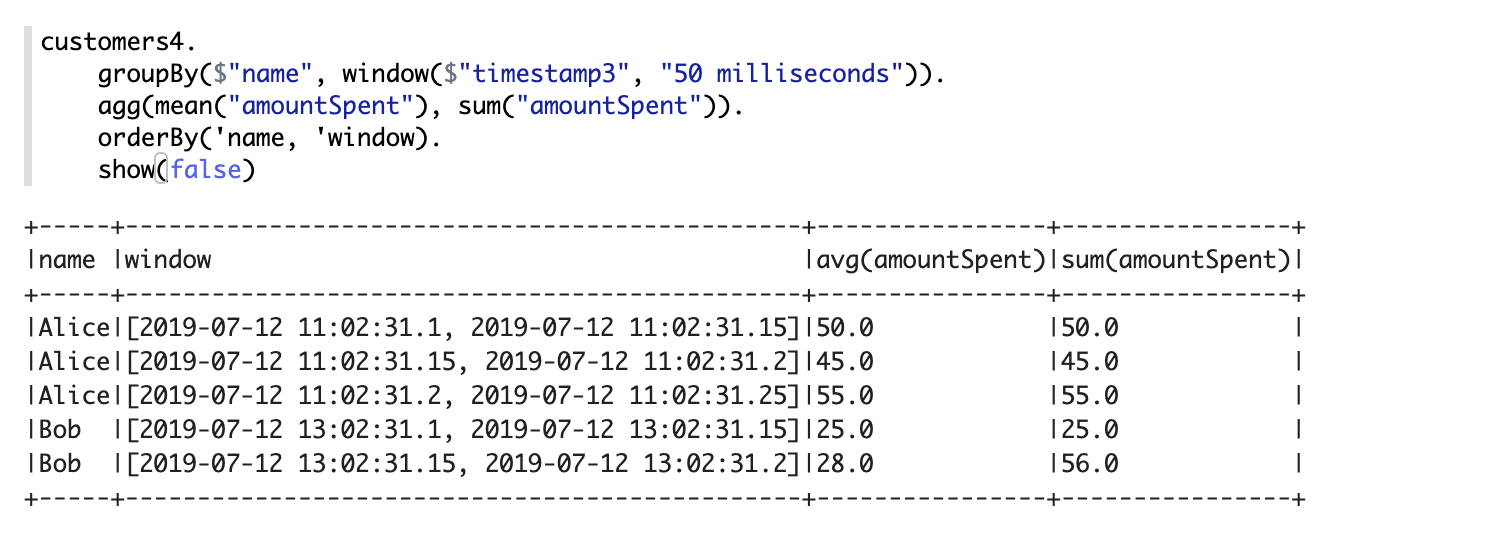

In [10]:
Image('./capture/12_window.png')